In [1]:
from common import *
from matplotlib import pyplot as plt
import smart_open

In [2]:
with open(join(DATA_FOLDER, 'gold_mongo.json'), 'r') as f:
    gold = json.load(f)

In [5]:
def iter_docs(fnames):
    for i, fn in enumerate(fnames):
        logging.info("%s: " % i + fn)
        with GzipFile(fn, 'rb') as f:
            docs = ujson.loads(f.read())
        for k,doc in docs.items():
            yield k,doc

                
class Documents(object):
    def __init__(self, folder, tokens_only=False):
        self.folder = folder
        self.tokens_only = tokens_only
 
    def __iter__(self):
        fnames = glob(join(self.folder, '*.json.gz'))
        for k, doc in iter_docs(fnames):
            unlisted = [w for s in doc for w in s]
            if self.tokens_only:
                yield unlisted
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(unlisted, [k])

In [ ]:
folder = join(DATA_FOLDER, 'documents/')

model = Doc2Vec(Documents(folder), size=200, window=5, min_count=5, dm=1, workers=cpu_count, iter=10)

2017-10-01 04:50:04,044 [MainThread  ] [INFO ]  collecting all words and their counts
2017-10-01 04:50:04,117 [MainThread  ] [INFO ]  PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2017-10-01 04:50:09,773 [MainThread  ] [INFO ]  PROGRESS: at example #10000, processed 5214517 words (922162/s), 113415 word types, 10000 tags
2017-10-01 04:50:15,958 [MainThread  ] [INFO ]  PROGRESS: at example #20000, processed 10791718 words (902043/s), 157599 word types, 20000 tags
2017-10-01 04:50:25,813 [MainThread  ] [INFO ]  PROGRESS: at example #30000, processed 19494360 words (883210/s), 197295 word types, 30000 tags
2017-10-01 04:50:38,216 [MainThread  ] [INFO ]  PROGRESS: at example #40000, processed 30923454 words (921582/s), 249001 word types, 40000 tags
2017-10-01 04:50:51,376 [MainThread  ] [INFO ]  PROGRESS: at example #50000, processed 42448329 words (875943/s), 299432 word types, 50000 tags
2017-10-01 04:51:07,653 [MainThread  ] [INFO ]  PROGRESS: at example #60000,

2017-10-01 05:01:50,472 [MainThread  ] [INFO ]  PROGRESS: at example #560000, processed 648467784 words (963607/s), 1785551 word types, 560000 tags
2017-10-01 05:01:59,755 [MainThread  ] [INFO ]  PROGRESS: at example #570000, processed 656672603 words (884060/s), 1796398 word types, 570000 tags
2017-10-01 05:02:08,395 [MainThread  ] [INFO ]  PROGRESS: at example #580000, processed 664693015 words (928388/s), 1806147 word types, 580000 tags
2017-10-01 05:02:24,502 [MainThread  ] [INFO ]  PROGRESS: at example #590000, processed 678635295 words (865620/s), 1821075 word types, 590000 tags
2017-10-01 05:02:36,603 [MainThread  ] [INFO ]  PROGRESS: at example #600000, processed 690034909 words (942171/s), 1836691 word types, 600000 tags
2017-10-01 05:02:47,822 [MainThread  ] [INFO ]  PROGRESS: at example #610000, processed 699699482 words (861512/s), 1848204 word types, 610000 tags
2017-10-01 05:03:00,001 [MainThread  ] [INFO ]  PROGRESS: at example #620000, processed 711352800 words (956980/

2017-10-01 05:14:41,906 [MainThread  ] [INFO ]  PROGRESS: at example #1120000, processed 1339681171 words (879528/s), 2698903 word types, 1120000 tags
2017-10-01 05:14:56,665 [MainThread  ] [INFO ]  PROGRESS: at example #1130000, processed 1352440468 words (864530/s), 2729545 word types, 1130000 tags
2017-10-01 05:15:08,230 [MainThread  ] [INFO ]  PROGRESS: at example #1140000, processed 1362980551 words (911513/s), 2752907 word types, 1140000 tags
2017-10-01 05:15:21,775 [MainThread  ] [INFO ]  PROGRESS: at example #1150000, processed 1374025791 words (815543/s), 2762668 word types, 1150000 tags
2017-10-01 05:15:29,910 [MainThread  ] [INFO ]  PROGRESS: at example #1160000, processed 1381665221 words (939200/s), 2775862 word types, 1160000 tags
2017-10-01 05:15:41,187 [MainThread  ] [INFO ]  PROGRESS: at example #1170000, processed 1392029649 words (919165/s), 2782692 word types, 1170000 tags
2017-10-01 05:15:56,039 [MainThread  ] [INFO ]  PROGRESS: at example #1180000, processed 14047

2017-10-01 05:19:39,702 [MainThread  ] [INFO ]  PROGRESS: at 0.25% examples, 413469 words/s, in_qsize 10, out_qsize 1
2017-10-01 05:19:40,728 [MainThread  ] [INFO ]  PROGRESS: at 0.25% examples, 419177 words/s, in_qsize 30, out_qsize 0
2017-10-01 05:19:41,737 [MainThread  ] [INFO ]  PROGRESS: at 0.26% examples, 425383 words/s, in_qsize 32, out_qsize 0
2017-10-01 05:19:42,737 [MainThread  ] [INFO ]  PROGRESS: at 0.26% examples, 425251 words/s, in_qsize 26, out_qsize 0
2017-10-01 05:19:43,755 [MainThread  ] [INFO ]  PROGRESS: at 0.26% examples, 427017 words/s, in_qsize 14, out_qsize 0
2017-10-01 05:19:44,941 [MainThread  ] [INFO ]  PROGRESS: at 0.26% examples, 417932 words/s, in_qsize 24, out_qsize 0
2017-10-01 05:19:45,945 [MainThread  ] [INFO ]  PROGRESS: at 0.27% examples, 422428 words/s, in_qsize 29, out_qsize 0
2017-10-01 05:19:46,945 [MainThread  ] [INFO ]  PROGRESS: at 0.28% examples, 429790 words/s, in_qsize 29, out_qsize 0
2017-10-01 05:19:47,947 [MainThread  ] [INFO ]  PROGRESS

2017-10-01 05:21:03,906 [MainThread  ] [INFO ]  PROGRESS: at 0.50% examples, 460455 words/s, in_qsize 0, out_qsize 0
2017-10-01 05:21:05,106 [MainThread  ] [INFO ]  PROGRESS: at 0.50% examples, 459904 words/s, in_qsize 6, out_qsize 0
2017-10-01 05:21:06,467 [MainThread  ] [INFO ]  PROGRESS: at 0.50% examples, 456586 words/s, in_qsize 21, out_qsize 0
2017-10-01 05:21:07,480 [MainThread  ] [INFO ]  PROGRESS: at 0.51% examples, 458079 words/s, in_qsize 29, out_qsize 0
2017-10-01 05:21:08,486 [MainThread  ] [INFO ]  PROGRESS: at 0.52% examples, 460310 words/s, in_qsize 31, out_qsize 0
2017-10-01 05:21:09,511 [MainThread  ] [INFO ]  PROGRESS: at 0.52% examples, 460992 words/s, in_qsize 17, out_qsize 0
2017-10-01 05:21:10,533 [MainThread  ] [INFO ]  PROGRESS: at 0.52% examples, 458373 words/s, in_qsize 31, out_qsize 0
2017-10-01 05:21:11,544 [MainThread  ] [INFO ]  PROGRESS: at 0.53% examples, 458860 words/s, in_qsize 31, out_qsize 0
2017-10-01 05:21:12,545 [MainThread  ] [INFO ]  PROGRESS: 

2017-10-01 05:22:31,381 [MainThread  ] [INFO ]  PROGRESS: at 0.83% examples, 457370 words/s, in_qsize 32, out_qsize 0
2017-10-01 05:22:32,382 [MainThread  ] [INFO ]  PROGRESS: at 0.84% examples, 456698 words/s, in_qsize 31, out_qsize 0
2017-10-01 05:22:33,578 [MainThread  ] [INFO ]  PROGRESS: at 0.85% examples, 454671 words/s, in_qsize 25, out_qsize 0
2017-10-01 05:22:34,592 [MainThread  ] [INFO ]  PROGRESS: at 0.86% examples, 454802 words/s, in_qsize 32, out_qsize 0
2017-10-01 05:22:35,596 [MainThread  ] [INFO ]  PROGRESS: at 0.87% examples, 456106 words/s, in_qsize 29, out_qsize 0
2017-10-01 05:22:36,631 [MainThread  ] [INFO ]  PROGRESS: at 0.87% examples, 456682 words/s, in_qsize 9, out_qsize 0
2017-10-01 05:22:38,312 [MainThread  ] [INFO ]  PROGRESS: at 0.87% examples, 453765 words/s, in_qsize 0, out_qsize 0
2017-10-01 05:22:39,313 [MainThread  ] [INFO ]  PROGRESS: at 0.87% examples, 455663 words/s, in_qsize 0, out_qsize 0
2017-10-01 05:22:40,342 [MainThread  ] [INFO ]  PROGRESS: a

2017-10-01 05:23:54,646 [MainThread  ] [INFO ]  PROGRESS: at 1.14% examples, 459093 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:20:15,213 [MainThread  ] [INFO ]  PROGRESS: at 48.35% examples, 462736 words/s, in_qsize 18, out_qsize 0
2017-10-01 09:20:16,255 [MainThread  ] [INFO ]  PROGRESS: at 48.36% examples, 462745 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:20:17,258 [MainThread  ] [INFO ]  PROGRESS: at 48.37% examples, 462757 words/s, in_qsize 26, out_qsize 0
2017-10-01 09:20:22,140 [MainThread  ] [INFO ]  PROGRESS: at 48.37% examples, 462627 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:20:23,154 [MainThread  ] [INFO ]  PROGRESS: at 48.37% examples, 462657 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:20:24,180 [MainThread  ] [INFO ]  PROGRESS: at 48.37% examples, 462690 words/s, in_qsize 0, out_qsize 2
2017-10-01 09:20:25,190 [MainThread  ] [INFO ]  PROGRESS: at 48.38% examples, 462721 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:20:26,193 [MainThread  ] [INFO ]  PROGR

2017-10-01 09:21:46,594 [MainThread  ] [INFO ]  PROGRESS: at 48.60% examples, 462739 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:21:47,599 [MainThread  ] [INFO ]  PROGRESS: at 48.60% examples, 462755 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:21:48,600 [MainThread  ] [INFO ]  PROGRESS: at 48.61% examples, 462779 words/s, in_qsize 30, out_qsize 1
2017-10-01 09:21:49,804 [MainThread  ] [INFO ]  PROGRESS: at 48.61% examples, 462793 words/s, in_qsize 20, out_qsize 0
2017-10-01 09:21:51,260 [MainThread  ] [INFO ]  PROGRESS: at 48.61% examples, 462766 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:21:52,264 [MainThread  ] [INFO ]  PROGRESS: at 48.62% examples, 462778 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:21:53,280 [MainThread  ] [INFO ]  PROGRESS: at 48.63% examples, 462796 words/s, in_qsize 27, out_qsize 0
2017-10-01 09:21:55,688 [MainThread  ] [INFO ]  PROGRESS: at 48.63% examples, 462730 words/s, in_qsize 11, out_qsize 0
2017-10-01 09:21:56,700 [MainThread  ] [INFO ]  P

2017-10-01 09:23:14,847 [MainThread  ] [INFO ]  PROGRESS: at 48.85% examples, 462756 words/s, in_qsize 20, out_qsize 0
2017-10-01 09:23:15,909 [MainThread  ] [INFO ]  PROGRESS: at 48.85% examples, 462762 words/s, in_qsize 30, out_qsize 1
2017-10-01 09:23:17,960 [MainThread  ] [INFO ]  PROGRESS: at 48.86% examples, 462711 words/s, in_qsize 9, out_qsize 0
2017-10-01 09:23:18,960 [MainThread  ] [INFO ]  PROGRESS: at 48.86% examples, 462728 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:23:19,986 [MainThread  ] [INFO ]  PROGRESS: at 48.86% examples, 462752 words/s, in_qsize 31, out_qsize 1
2017-10-01 09:23:20,987 [MainThread  ] [INFO ]  PROGRESS: at 48.87% examples, 462778 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:23:22,018 [MainThread  ] [INFO ]  PROGRESS: at 48.87% examples, 462785 words/s, in_qsize 0, out_qsize 3
2017-10-01 09:23:23,022 [MainThread  ] [INFO ]  PROGRESS: at 48.87% examples, 462757 words/s, in_qsize 1, out_qsize 0
2017-10-01 09:23:24,028 [MainThread  ] [INFO ]  PRO

2017-10-01 09:24:35,090 [MainThread  ] [INFO ]  PROGRESS: at 49.13% examples, 462705 words/s, in_qsize 31, out_qsize 1
2017-10-01 09:24:36,136 [MainThread  ] [INFO ]  PROGRESS: at 49.13% examples, 462704 words/s, in_qsize 27, out_qsize 0
2017-10-01 09:24:37,138 [MainThread  ] [INFO ]  PROGRESS: at 49.14% examples, 462693 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:24:38,205 [MainThread  ] [INFO ]  PROGRESS: at 49.15% examples, 462687 words/s, in_qsize 24, out_qsize 0
2017-10-01 09:24:40,469 [MainThread  ] [INFO ]  PROGRESS: at 49.15% examples, 462622 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:24:41,481 [MainThread  ] [INFO ]  PROGRESS: at 49.16% examples, 462638 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:24:42,512 [MainThread  ] [INFO ]  PROGRESS: at 49.17% examples, 462659 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:24:44,216 [MainThread  ] [INFO ]  PROGRESS: at 49.17% examples, 462641 words/s, in_qsize 5, out_qsize 0
2017-10-01 09:24:45,217 [MainThread  ] [INFO ]  P

2017-10-01 09:25:59,792 [MainThread  ] [INFO ]  PROGRESS: at 49.44% examples, 462619 words/s, in_qsize 31, out_qsize 1
2017-10-01 09:26:00,796 [MainThread  ] [INFO ]  PROGRESS: at 49.44% examples, 462643 words/s, in_qsize 24, out_qsize 4
2017-10-01 09:26:04,593 [MainThread  ] [INFO ]  PROGRESS: at 49.44% examples, 462555 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:26:05,597 [MainThread  ] [INFO ]  PROGRESS: at 49.44% examples, 462582 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:26:06,592 [MainThread  ] [INFO ]  PROGRESS: at 49.44% examples, 462612 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:26:07,600 [MainThread  ] [INFO ]  PROGRESS: at 49.45% examples, 462641 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:26:08,606 [MainThread  ] [INFO ]  PROGRESS: at 49.45% examples, 462671 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:26:09,962 [MainThread  ] [INFO ]  PROGRESS: at 49.45% examples, 462672 words/s, in_qsize 6, out_qsize 0
2017-10-01 09:26:11,017 [MainThread  ] [INFO ]  PROGRE

2017-10-01 09:27:25,825 [MainThread  ] [INFO ]  PROGRESS: at 49.70% examples, 462600 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:27:26,827 [MainThread  ] [INFO ]  PROGRESS: at 49.71% examples, 462614 words/s, in_qsize 13, out_qsize 0
2017-10-01 09:27:27,940 [MainThread  ] [INFO ]  PROGRESS: at 49.71% examples, 462583 words/s, in_qsize 6, out_qsize 1
2017-10-01 09:27:28,945 [MainThread  ] [INFO ]  PROGRESS: at 49.71% examples, 462597 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:27:29,960 [MainThread  ] [INFO ]  PROGRESS: at 49.72% examples, 462615 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:27:30,965 [MainThread  ] [INFO ]  PROGRESS: at 49.72% examples, 462605 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:27:31,976 [MainThread  ] [INFO ]  PROGRESS: at 49.73% examples, 462611 words/s, in_qsize 22, out_qsize 1
2017-10-01 09:27:32,981 [MainThread  ] [INFO ]  PROGRESS: at 49.73% examples, 462584 words/s, in_qsize 27, out_qsize 0
2017-10-01 09:27:33,984 [MainThread  ] [INFO ]  P

2017-10-01 09:28:50,347 [MainThread  ] [INFO ]  PROGRESS: at 50.02% examples, 462559 words/s, in_qsize 30, out_qsize 1
2017-10-01 09:28:51,910 [MainThread  ] [INFO ]  PROGRESS: at 50.02% examples, 462526 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:28:52,926 [MainThread  ] [INFO ]  PROGRESS: at 50.03% examples, 462536 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:28:53,928 [MainThread  ] [INFO ]  PROGRESS: at 50.04% examples, 462554 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:28:56,211 [MainThread  ] [INFO ]  PROGRESS: at 50.04% examples, 462508 words/s, in_qsize 14, out_qsize 2
2017-10-01 09:28:57,241 [MainThread  ] [INFO ]  PROGRESS: at 50.04% examples, 462519 words/s, in_qsize 29, out_qsize 3
2017-10-01 09:28:58,244 [MainThread  ] [INFO ]  PROGRESS: at 50.05% examples, 462519 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:28:59,246 [MainThread  ] [INFO ]  PROGRESS: at 50.05% examples, 462516 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:29:00,264 [MainThread  ] [INFO ]  

2017-10-01 09:30:12,343 [MainThread  ] [INFO ]  PROGRESS: at 50.37% examples, 462376 words/s, in_qsize 28, out_qsize 0
2017-10-01 09:30:13,360 [MainThread  ] [INFO ]  PROGRESS: at 50.37% examples, 462402 words/s, in_qsize 30, out_qsize 2
2017-10-01 09:30:14,372 [MainThread  ] [INFO ]  PROGRESS: at 50.38% examples, 462427 words/s, in_qsize 30, out_qsize 1
2017-10-01 09:30:15,498 [MainThread  ] [INFO ]  PROGRESS: at 50.38% examples, 462439 words/s, in_qsize 14, out_qsize 1
2017-10-01 09:30:17,367 [MainThread  ] [INFO ]  PROGRESS: at 50.38% examples, 462400 words/s, in_qsize 29, out_qsize 0
2017-10-01 09:30:18,372 [MainThread  ] [INFO ]  PROGRESS: at 50.39% examples, 462411 words/s, in_qsize 29, out_qsize 0
2017-10-01 09:30:19,375 [MainThread  ] [INFO ]  PROGRESS: at 50.40% examples, 462430 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:30:20,427 [MainThread  ] [INFO ]  PROGRESS: at 50.40% examples, 462445 words/s, in_qsize 9, out_qsize 0
2017-10-01 09:30:22,079 [MainThread  ] [INFO ]  P

2017-10-01 09:31:43,439 [MainThread  ] [INFO ]  PROGRESS: at 50.60% examples, 462447 words/s, in_qsize 29, out_qsize 0
2017-10-01 09:31:44,449 [MainThread  ] [INFO ]  PROGRESS: at 50.61% examples, 462463 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:31:45,450 [MainThread  ] [INFO ]  PROGRESS: at 50.61% examples, 462463 words/s, in_qsize 29, out_qsize 0
2017-10-01 09:31:47,208 [MainThread  ] [INFO ]  PROGRESS: at 50.61% examples, 462423 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:31:48,220 [MainThread  ] [INFO ]  PROGRESS: at 50.62% examples, 462437 words/s, in_qsize 29, out_qsize 0
2017-10-01 09:31:49,222 [MainThread  ] [INFO ]  PROGRESS: at 50.62% examples, 462455 words/s, in_qsize 29, out_qsize 0
2017-10-01 09:31:50,266 [MainThread  ] [INFO ]  PROGRESS: at 50.63% examples, 462473 words/s, in_qsize 19, out_qsize 1
2017-10-01 09:31:53,147 [MainThread  ] [INFO ]  PROGRESS: at 50.63% examples, 462405 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:31:54,149 [MainThread  ] [INFO ]  P

2017-10-01 09:33:08,467 [MainThread  ] [INFO ]  PROGRESS: at 50.95% examples, 462253 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:33:09,467 [MainThread  ] [INFO ]  PROGRESS: at 50.95% examples, 462281 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:33:10,481 [MainThread  ] [INFO ]  PROGRESS: at 50.95% examples, 462299 words/s, in_qsize 24, out_qsize 0
2017-10-01 09:33:11,481 [MainThread  ] [INFO ]  PROGRESS: at 50.96% examples, 462332 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:33:12,985 [MainThread  ] [INFO ]  PROGRESS: at 50.96% examples, 462336 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:33:13,996 [MainThread  ] [INFO ]  PROGRESS: at 50.96% examples, 462328 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:33:15,579 [MainThread  ] [INFO ]  PROGRESS: at 50.97% examples, 462302 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:33:16,614 [MainThread  ] [INFO ]  PROGRESS: at 50.98% examples, 462308 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:33:17,626 [MainThread  ] [INFO ]  PROG

2017-10-01 09:34:30,151 [MainThread  ] [INFO ]  PROGRESS: at 51.28% examples, 462235 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:34:32,209 [MainThread  ] [INFO ]  PROGRESS: at 51.29% examples, 462189 words/s, in_qsize 24, out_qsize 0
2017-10-01 09:34:33,222 [MainThread  ] [INFO ]  PROGRESS: at 51.30% examples, 462195 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:34:34,226 [MainThread  ] [INFO ]  PROGRESS: at 51.30% examples, 462220 words/s, in_qsize 28, out_qsize 0
2017-10-01 09:34:35,278 [MainThread  ] [INFO ]  PROGRESS: at 51.31% examples, 462239 words/s, in_qsize 25, out_qsize 0
2017-10-01 09:34:36,281 [MainThread  ] [INFO ]  PROGRESS: at 51.31% examples, 462233 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:34:37,294 [MainThread  ] [INFO ]  PROGRESS: at 51.32% examples, 462220 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:34:38,311 [MainThread  ] [INFO ]  PROGRESS: at 51.33% examples, 462230 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:34:39,366 [MainThread  ] [INFO ]  

2017-10-01 09:35:59,621 [MainThread  ] [INFO ]  PROGRESS: at 51.58% examples, 462198 words/s, in_qsize 9, out_qsize 0
2017-10-01 09:36:02,697 [MainThread  ] [INFO ]  PROGRESS: at 51.59% examples, 462121 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:36:03,702 [MainThread  ] [INFO ]  PROGRESS: at 51.59% examples, 462149 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:36:04,708 [MainThread  ] [INFO ]  PROGRESS: at 51.59% examples, 462178 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:36:05,709 [MainThread  ] [INFO ]  PROGRESS: at 51.60% examples, 462208 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:36:06,712 [MainThread  ] [INFO ]  PROGRESS: at 51.60% examples, 462239 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:36:07,715 [MainThread  ] [INFO ]  PROGRESS: at 51.60% examples, 462270 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:36:08,793 [MainThread  ] [INFO ]  PROGRESS: at 51.60% examples, 462260 words/s, in_qsize 21, out_qsize 0
2017-10-01 09:36:09,819 [MainThread  ] [INFO ]  PROGRES

2017-10-01 09:37:25,735 [MainThread  ] [INFO ]  PROGRESS: at 51.88% examples, 462211 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:37:28,554 [MainThread  ] [INFO ]  PROGRESS: at 51.88% examples, 462155 words/s, in_qsize 7, out_qsize 1
2017-10-01 09:37:29,561 [MainThread  ] [INFO ]  PROGRESS: at 51.88% examples, 462168 words/s, in_qsize 30, out_qsize 1
2017-10-01 09:37:30,588 [MainThread  ] [INFO ]  PROGRESS: at 51.89% examples, 462185 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:37:31,762 [MainThread  ] [INFO ]  PROGRESS: at 51.89% examples, 462177 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:37:32,788 [MainThread  ] [INFO ]  PROGRESS: at 51.90% examples, 462174 words/s, in_qsize 26, out_qsize 0
2017-10-01 09:37:33,805 [MainThread  ] [INFO ]  PROGRESS: at 51.90% examples, 462158 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:37:34,810 [MainThread  ] [INFO ]  PROGRESS: at 51.91% examples, 462167 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:37:35,817 [MainThread  ] [INFO ]  P

2017-10-01 09:38:47,499 [MainThread  ] [INFO ]  PROGRESS: at 52.19% examples, 462039 words/s, in_qsize 29, out_qsize 1
2017-10-01 09:38:48,503 [MainThread  ] [INFO ]  PROGRESS: at 52.19% examples, 462067 words/s, in_qsize 10, out_qsize 0
2017-10-01 09:38:49,504 [MainThread  ] [INFO ]  PROGRESS: at 52.20% examples, 462098 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:38:50,506 [MainThread  ] [INFO ]  PROGRESS: at 52.20% examples, 462124 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:38:52,243 [MainThread  ] [INFO ]  PROGRESS: at 52.20% examples, 462120 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:38:53,251 [MainThread  ] [INFO ]  PROGRESS: at 52.21% examples, 462124 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:38:54,264 [MainThread  ] [INFO ]  PROGRESS: at 52.21% examples, 462120 words/s, in_qsize 21, out_qsize 0
2017-10-01 09:38:55,269 [MainThread  ] [INFO ]  PROGRESS: at 52.21% examples, 462093 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:38:56,283 [MainThread  ] [INFO ]  PRO

2017-10-01 09:40:17,784 [MainThread  ] [INFO ]  PROGRESS: at 52.43% examples, 462070 words/s, in_qsize 21, out_qsize 0
2017-10-01 09:40:18,800 [MainThread  ] [INFO ]  PROGRESS: at 52.44% examples, 462075 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:40:19,804 [MainThread  ] [INFO ]  PROGRESS: at 52.45% examples, 462092 words/s, in_qsize 28, out_qsize 1
2017-10-01 09:40:20,829 [MainThread  ] [INFO ]  PROGRESS: at 52.45% examples, 462101 words/s, in_qsize 4, out_qsize 0
2017-10-01 09:40:23,970 [MainThread  ] [INFO ]  PROGRESS: at 52.45% examples, 462020 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:40:24,976 [MainThread  ] [INFO ]  PROGRESS: at 52.45% examples, 462048 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:40:25,985 [MainThread  ] [INFO ]  PROGRESS: at 52.45% examples, 462076 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:40:26,997 [MainThread  ] [INFO ]  PROGRESS: at 52.46% examples, 462107 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:40:28,014 [MainThread  ] [INFO ]  PROGR

2017-10-01 09:41:41,111 [MainThread  ] [INFO ]  PROGRESS: at 52.69% examples, 462033 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:41:42,137 [MainThread  ] [INFO ]  PROGRESS: at 52.69% examples, 462058 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:41:45,750 [MainThread  ] [INFO ]  PROGRESS: at 52.69% examples, 461991 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:41:46,750 [MainThread  ] [INFO ]  PROGRESS: at 52.69% examples, 462013 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:41:47,795 [MainThread  ] [INFO ]  PROGRESS: at 52.69% examples, 462036 words/s, in_qsize 25, out_qsize 0
2017-10-01 09:41:48,803 [MainThread  ] [INFO ]  PROGRESS: at 52.70% examples, 462064 words/s, in_qsize 3, out_qsize 0
2017-10-01 09:41:52,286 [MainThread  ] [INFO ]  PROGRESS: at 52.70% examples, 462017 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:41:53,290 [MainThread  ] [INFO ]  PROGRESS: at 52.70% examples, 462040 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:41:54,294 [MainThread  ] [INFO ]  PROGRES

2017-10-01 09:43:13,203 [MainThread  ] [INFO ]  PROGRESS: at 52.96% examples, 462034 words/s, in_qsize 25, out_qsize 1
2017-10-01 09:43:14,209 [MainThread  ] [INFO ]  PROGRESS: at 52.96% examples, 462060 words/s, in_qsize 21, out_qsize 1
2017-10-01 09:43:15,998 [MainThread  ] [INFO ]  PROGRESS: at 52.96% examples, 462044 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:43:17,009 [MainThread  ] [INFO ]  PROGRESS: at 52.96% examples, 462057 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:43:18,604 [MainThread  ] [INFO ]  PROGRESS: at 52.97% examples, 462040 words/s, in_qsize 13, out_qsize 0
2017-10-01 09:43:19,606 [MainThread  ] [INFO ]  PROGRESS: at 52.97% examples, 462051 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:43:21,855 [MainThread  ] [INFO ]  PROGRESS: at 52.98% examples, 462025 words/s, in_qsize 25, out_qsize 0
2017-10-01 09:43:23,505 [MainThread  ] [INFO ]  PROGRESS: at 52.98% examples, 462001 words/s, in_qsize 23, out_qsize 0
2017-10-01 09:43:24,513 [MainThread  ] [INFO ]  P

2017-10-01 09:44:40,043 [MainThread  ] [INFO ]  PROGRESS: at 53.25% examples, 461986 words/s, in_qsize 15, out_qsize 0
2017-10-01 09:44:41,052 [MainThread  ] [INFO ]  PROGRESS: at 53.25% examples, 462016 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:44:43,051 [MainThread  ] [INFO ]  PROGRESS: at 53.25% examples, 461992 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:44:44,059 [MainThread  ] [INFO ]  PROGRESS: at 53.25% examples, 462003 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:44:45,080 [MainThread  ] [INFO ]  PROGRESS: at 53.26% examples, 462014 words/s, in_qsize 14, out_qsize 1
2017-10-01 09:44:46,079 [MainThread  ] [INFO ]  PROGRESS: at 53.26% examples, 461992 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:44:47,089 [MainThread  ] [INFO ]  PROGRESS: at 53.26% examples, 462008 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:44:48,512 [MainThread  ] [INFO ]  PROGRESS: at 53.27% examples, 462000 words/s, in_qsize 17, out_qsize 0
2017-10-01 09:44:49,520 [MainThread  ] [INFO ]  PR

2017-10-01 09:46:09,769 [MainThread  ] [INFO ]  PROGRESS: at 53.53% examples, 461855 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:46:10,783 [MainThread  ] [INFO ]  PROGRESS: at 53.54% examples, 461867 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:46:11,792 [MainThread  ] [INFO ]  PROGRESS: at 53.54% examples, 461892 words/s, in_qsize 27, out_qsize 0
2017-10-01 09:46:12,795 [MainThread  ] [INFO ]  PROGRESS: at 53.55% examples, 461915 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:46:13,978 [MainThread  ] [INFO ]  PROGRESS: at 53.55% examples, 461923 words/s, in_qsize 17, out_qsize 0
2017-10-01 09:46:15,499 [MainThread  ] [INFO ]  PROGRESS: at 53.55% examples, 461896 words/s, in_qsize 21, out_qsize 0
2017-10-01 09:46:16,514 [MainThread  ] [INFO ]  PROGRESS: at 53.56% examples, 461903 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:46:17,518 [MainThread  ] [INFO ]  PROGRESS: at 53.57% examples, 461918 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:46:19,336 [MainThread  ] [INFO ]  

2017-10-01 09:47:40,757 [MainThread  ] [INFO ]  PROGRESS: at 53.80% examples, 461901 words/s, in_qsize 16, out_qsize 1
2017-10-01 09:47:41,772 [MainThread  ] [INFO ]  PROGRESS: at 53.80% examples, 461888 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:47:42,806 [MainThread  ] [INFO ]  PROGRESS: at 53.81% examples, 461898 words/s, in_qsize 30, out_qsize 1
2017-10-01 09:47:44,513 [MainThread  ] [INFO ]  PROGRESS: at 53.81% examples, 461864 words/s, in_qsize 8, out_qsize 0
2017-10-01 09:47:45,524 [MainThread  ] [INFO ]  PROGRESS: at 53.81% examples, 461877 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:47:46,531 [MainThread  ] [INFO ]  PROGRESS: at 53.81% examples, 461897 words/s, in_qsize 31, out_qsize 1
2017-10-01 09:47:47,709 [MainThread  ] [INFO ]  PROGRESS: at 53.82% examples, 461899 words/s, in_qsize 20, out_qsize 0
2017-10-01 09:47:48,720 [MainThread  ] [INFO ]  PROGRESS: at 53.82% examples, 461898 words/s, in_qsize 20, out_qsize 0
2017-10-01 09:47:51,139 [MainThread  ] [INFO ]  P

2017-10-01 09:49:02,537 [MainThread  ] [INFO ]  PROGRESS: at 54.11% examples, 461810 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:49:03,707 [MainThread  ] [INFO ]  PROGRESS: at 54.12% examples, 461792 words/s, in_qsize 18, out_qsize 0
2017-10-01 09:49:04,738 [MainThread  ] [INFO ]  PROGRESS: at 54.12% examples, 461806 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:49:05,795 [MainThread  ] [INFO ]  PROGRESS: at 54.13% examples, 461811 words/s, in_qsize 14, out_qsize 0
2017-10-01 09:49:06,818 [MainThread  ] [INFO ]  PROGRESS: at 54.13% examples, 461788 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:49:07,829 [MainThread  ] [INFO ]  PROGRESS: at 54.13% examples, 461803 words/s, in_qsize 26, out_qsize 0
2017-10-01 09:49:08,846 [MainThread  ] [INFO ]  PROGRESS: at 54.14% examples, 461819 words/s, in_qsize 26, out_qsize 0
2017-10-01 09:49:11,660 [MainThread  ] [INFO ]  PROGRESS: at 54.14% examples, 461752 words/s, in_qsize 3, out_qsize 0
2017-10-01 09:49:12,664 [MainThread  ] [INFO ]  P

2017-10-01 09:50:27,882 [MainThread  ] [INFO ]  PROGRESS: at 54.39% examples, 461729 words/s, in_qsize 3, out_qsize 0
2017-10-01 09:50:28,882 [MainThread  ] [INFO ]  PROGRESS: at 54.40% examples, 461752 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:50:29,887 [MainThread  ] [INFO ]  PROGRESS: at 54.40% examples, 461779 words/s, in_qsize 30, out_qsize 1
2017-10-01 09:50:31,765 [MainThread  ] [INFO ]  PROGRESS: at 54.40% examples, 461749 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:50:32,791 [MainThread  ] [INFO ]  PROGRESS: at 54.40% examples, 461760 words/s, in_qsize 29, out_qsize 5
2017-10-01 09:50:33,795 [MainThread  ] [INFO ]  PROGRESS: at 54.41% examples, 461781 words/s, in_qsize 28, out_qsize 0
2017-10-01 09:50:35,853 [MainThread  ] [INFO ]  PROGRESS: at 54.41% examples, 461747 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:50:36,866 [MainThread  ] [INFO ]  PROGRESS: at 54.41% examples, 461766 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:50:37,881 [MainThread  ] [INFO ]  PRO

2017-10-01 09:51:51,246 [MainThread  ] [INFO ]  PROGRESS: at 54.69% examples, 461745 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:51:52,252 [MainThread  ] [INFO ]  PROGRESS: at 54.70% examples, 461757 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:51:53,508 [MainThread  ] [INFO ]  PROGRESS: at 54.71% examples, 461747 words/s, in_qsize 2, out_qsize 1
2017-10-01 09:51:56,318 [MainThread  ] [INFO ]  PROGRESS: at 54.71% examples, 461672 words/s, in_qsize 0, out_qsize 1
2017-10-01 09:51:57,331 [MainThread  ] [INFO ]  PROGRESS: at 54.71% examples, 461688 words/s, in_qsize 29, out_qsize 2
2017-10-01 09:51:58,335 [MainThread  ] [INFO ]  PROGRESS: at 54.71% examples, 461712 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:51:59,342 [MainThread  ] [INFO ]  PROGRESS: at 54.72% examples, 461736 words/s, in_qsize 17, out_qsize 0
2017-10-01 09:52:00,351 [MainThread  ] [INFO ]  PROGRESS: at 54.72% examples, 461753 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:52:01,716 [MainThread  ] [INFO ]  PRO

2017-10-01 09:53:20,090 [MainThread  ] [INFO ]  PROGRESS: at 55.01% examples, 461694 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:53:21,103 [MainThread  ] [INFO ]  PROGRESS: at 55.01% examples, 461690 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:53:22,986 [MainThread  ] [INFO ]  PROGRESS: at 55.02% examples, 461657 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:53:23,994 [MainThread  ] [INFO ]  PROGRESS: at 55.03% examples, 461668 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:53:25,007 [MainThread  ] [INFO ]  PROGRESS: at 55.03% examples, 461685 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:53:27,139 [MainThread  ] [INFO ]  PROGRESS: at 55.04% examples, 461658 words/s, in_qsize 23, out_qsize 0
2017-10-01 09:53:28,349 [MainThread  ] [INFO ]  PROGRESS: at 55.04% examples, 461658 words/s, in_qsize 18, out_qsize 0
2017-10-01 09:53:30,671 [MainThread  ] [INFO ]  PROGRESS: at 55.05% examples, 461603 words/s, in_qsize 24, out_qsize 0
2017-10-01 09:53:31,693 [MainThread  ] [INFO ]  

2017-10-01 09:54:51,309 [MainThread  ] [INFO ]  PROGRESS: at 55.26% examples, 461690 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:54:53,076 [MainThread  ] [INFO ]  PROGRESS: at 55.26% examples, 461654 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:54:54,098 [MainThread  ] [INFO ]  PROGRESS: at 55.27% examples, 461665 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:54:55,098 [MainThread  ] [INFO ]  PROGRESS: at 55.28% examples, 461684 words/s, in_qsize 30, out_qsize 0
2017-10-01 09:54:56,220 [MainThread  ] [INFO ]  PROGRESS: at 55.28% examples, 461690 words/s, in_qsize 6, out_qsize 0
2017-10-01 09:54:59,472 [MainThread  ] [INFO ]  PROGRESS: at 55.28% examples, 461611 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:55:00,477 [MainThread  ] [INFO ]  PROGRESS: at 55.28% examples, 461628 words/s, in_qsize 6, out_qsize 2
2017-10-01 09:55:01,483 [MainThread  ] [INFO ]  PROGRESS: at 55.28% examples, 461649 words/s, in_qsize 14, out_qsize 1
2017-10-01 09:55:02,488 [MainThread  ] [INFO ]  PRO

2017-10-01 09:56:14,353 [MainThread  ] [INFO ]  PROGRESS: at 55.52% examples, 461607 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:56:15,367 [MainThread  ] [INFO ]  PROGRESS: at 55.53% examples, 461622 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:56:16,486 [MainThread  ] [INFO ]  PROGRESS: at 55.53% examples, 461614 words/s, in_qsize 13, out_qsize 0
2017-10-01 09:56:17,489 [MainThread  ] [INFO ]  PROGRESS: at 55.53% examples, 461621 words/s, in_qsize 32, out_qsize 0
2017-10-01 09:56:18,588 [MainThread  ] [INFO ]  PROGRESS: at 55.54% examples, 461612 words/s, in_qsize 5, out_qsize 0
2017-10-01 09:56:20,423 [MainThread  ] [INFO ]  PROGRESS: at 55.54% examples, 461564 words/s, in_qsize 14, out_qsize 0
2017-10-01 09:56:21,443 [MainThread  ] [INFO ]  PROGRESS: at 55.54% examples, 461583 words/s, in_qsize 23, out_qsize 0
2017-10-01 09:56:22,473 [MainThread  ] [INFO ]  PROGRESS: at 55.54% examples, 461604 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:56:23,484 [MainThread  ] [INFO ]  P

2017-10-01 09:57:41,952 [MainThread  ] [INFO ]  PROGRESS: at 55.78% examples, 461592 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:57:42,963 [MainThread  ] [INFO ]  PROGRESS: at 55.78% examples, 461599 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:57:44,209 [MainThread  ] [INFO ]  PROGRESS: at 55.79% examples, 461580 words/s, in_qsize 17, out_qsize 0
2017-10-01 09:57:45,230 [MainThread  ] [INFO ]  PROGRESS: at 55.79% examples, 461593 words/s, in_qsize 32, out_qsize 1
2017-10-01 09:57:46,316 [MainThread  ] [INFO ]  PROGRESS: at 55.80% examples, 461601 words/s, in_qsize 20, out_qsize 0
2017-10-01 09:57:47,326 [MainThread  ] [INFO ]  PROGRESS: at 55.80% examples, 461578 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:57:48,343 [MainThread  ] [INFO ]  PROGRESS: at 55.80% examples, 461593 words/s, in_qsize 31, out_qsize 0
2017-10-01 09:57:49,559 [MainThread  ] [INFO ]  PROGRESS: at 55.81% examples, 461602 words/s, in_qsize 20, out_qsize 0
2017-10-01 09:57:50,877 [MainThread  ] [INFO ]  P

2017-10-01 09:59:04,347 [MainThread  ] [INFO ]  PROGRESS: at 56.07% examples, 461566 words/s, in_qsize 27, out_qsize 0
2017-10-01 09:59:07,680 [MainThread  ] [INFO ]  PROGRESS: at 56.07% examples, 461497 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:59:08,684 [MainThread  ] [INFO ]  PROGRESS: at 56.07% examples, 461518 words/s, in_qsize 0, out_qsize 2
2017-10-01 09:59:09,682 [MainThread  ] [INFO ]  PROGRESS: at 56.07% examples, 461546 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:59:10,716 [MainThread  ] [INFO ]  PROGRESS: at 56.08% examples, 461572 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:59:11,730 [MainThread  ] [INFO ]  PROGRESS: at 56.08% examples, 461600 words/s, in_qsize 0, out_qsize 0
2017-10-01 09:59:13,086 [MainThread  ] [INFO ]  PROGRESS: at 56.08% examples, 461588 words/s, in_qsize 5, out_qsize 0
2017-10-01 09:59:14,086 [MainThread  ] [INFO ]  PROGRESS: at 56.09% examples, 461591 words/s, in_qsize 21, out_qsize 0
2017-10-01 09:59:16,769 [MainThread  ] [INFO ]  PROGRE

2017-10-01 10:00:28,332 [MainThread  ] [INFO ]  PROGRESS: at 56.37% examples, 461499 words/s, in_qsize 11, out_qsize 2
2017-10-01 10:00:29,468 [MainThread  ] [INFO ]  PROGRESS: at 56.37% examples, 461473 words/s, in_qsize 4, out_qsize 1
2017-10-01 10:00:30,475 [MainThread  ] [INFO ]  PROGRESS: at 56.37% examples, 461486 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:00:31,534 [MainThread  ] [INFO ]  PROGRESS: at 56.38% examples, 461495 words/s, in_qsize 15, out_qsize 1
2017-10-01 10:00:33,396 [MainThread  ] [INFO ]  PROGRESS: at 56.38% examples, 461453 words/s, in_qsize 4, out_qsize 0
2017-10-01 10:00:34,415 [MainThread  ] [INFO ]  PROGRESS: at 56.38% examples, 461470 words/s, in_qsize 29, out_qsize 1
2017-10-01 10:00:35,415 [MainThread  ] [INFO ]  PROGRESS: at 56.38% examples, 461490 words/s, in_qsize 27, out_qsize 1
2017-10-01 10:00:36,415 [MainThread  ] [INFO ]  PROGRESS: at 56.39% examples, 461510 words/s, in_qsize 21, out_qsize 0
2017-10-01 10:00:38,259 [MainThread  ] [INFO ]  PR

2017-10-01 10:01:52,113 [MainThread  ] [INFO ]  PROGRESS: at 56.65% examples, 461445 words/s, in_qsize 30, out_qsize 2
2017-10-01 10:01:53,123 [MainThread  ] [INFO ]  PROGRESS: at 56.66% examples, 461466 words/s, in_qsize 22, out_qsize 0
2017-10-01 10:01:54,703 [MainThread  ] [INFO ]  PROGRESS: at 56.66% examples, 461434 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:01:55,705 [MainThread  ] [INFO ]  PROGRESS: at 56.66% examples, 461451 words/s, in_qsize 30, out_qsize 0
2017-10-01 10:01:56,711 [MainThread  ] [INFO ]  PROGRESS: at 56.67% examples, 461469 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:01:59,446 [MainThread  ] [INFO ]  PROGRESS: at 56.67% examples, 461410 words/s, in_qsize 8, out_qsize 0
2017-10-01 10:02:00,455 [MainThread  ] [INFO ]  PROGRESS: at 56.67% examples, 461425 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:02:01,472 [MainThread  ] [INFO ]  PROGRESS: at 56.68% examples, 461444 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:02:02,586 [MainThread  ] [INFO ]  PR

2017-10-01 10:03:22,716 [MainThread  ] [INFO ]  PROGRESS: at 56.92% examples, 461445 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:03:25,735 [MainThread  ] [INFO ]  PROGRESS: at 56.92% examples, 461402 words/s, in_qsize 0, out_qsize 2
2017-10-01 10:03:26,735 [MainThread  ] [INFO ]  PROGRESS: at 56.92% examples, 461424 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:03:27,746 [MainThread  ] [INFO ]  PROGRESS: at 56.93% examples, 461447 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:03:30,804 [MainThread  ] [INFO ]  PROGRESS: at 56.93% examples, 461411 words/s, in_qsize 0, out_qsize 1
2017-10-01 10:03:31,807 [MainThread  ] [INFO ]  PROGRESS: at 56.93% examples, 461430 words/s, in_qsize 17, out_qsize 0
2017-10-01 10:03:32,813 [MainThread  ] [INFO ]  PROGRESS: at 56.93% examples, 461450 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:03:33,831 [MainThread  ] [INFO ]  PROGRESS: at 56.94% examples, 461468 words/s, in_qsize 16, out_qsize 0
2017-10-01 10:03:36,222 [MainThread  ] [INFO ]  PROGR

2017-10-01 10:04:53,398 [MainThread  ] [INFO ]  PROGRESS: at 57.17% examples, 461413 words/s, in_qsize 28, out_qsize 0
2017-10-01 10:04:54,399 [MainThread  ] [INFO ]  PROGRESS: at 57.18% examples, 461431 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:04:56,337 [MainThread  ] [INFO ]  PROGRESS: at 57.18% examples, 461405 words/s, in_qsize 17, out_qsize 0
2017-10-01 10:04:57,344 [MainThread  ] [INFO ]  PROGRESS: at 57.19% examples, 461409 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:04:58,379 [MainThread  ] [INFO ]  PROGRESS: at 57.20% examples, 461423 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:05:00,161 [MainThread  ] [INFO ]  PROGRESS: at 57.20% examples, 461398 words/s, in_qsize 9, out_qsize 0
2017-10-01 10:05:01,164 [MainThread  ] [INFO ]  PROGRESS: at 57.20% examples, 461413 words/s, in_qsize 30, out_qsize 1
2017-10-01 10:05:02,183 [MainThread  ] [INFO ]  PROGRESS: at 57.21% examples, 461431 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:05:03,854 [MainThread  ] [INFO ]  P

2017-10-01 10:06:22,672 [MainThread  ] [INFO ]  PROGRESS: at 57.49% examples, 461332 words/s, in_qsize 15, out_qsize 0
2017-10-01 10:06:23,678 [MainThread  ] [INFO ]  PROGRESS: at 57.49% examples, 461346 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:06:24,765 [MainThread  ] [INFO ]  PROGRESS: at 57.50% examples, 461352 words/s, in_qsize 7, out_qsize 0
2017-10-01 10:06:25,767 [MainThread  ] [INFO ]  PROGRESS: at 57.50% examples, 461327 words/s, in_qsize 6, out_qsize 0
2017-10-01 10:06:26,792 [MainThread  ] [INFO ]  PROGRESS: at 57.50% examples, 461342 words/s, in_qsize 31, out_qsize 2
2017-10-01 10:06:27,805 [MainThread  ] [INFO ]  PROGRESS: at 57.51% examples, 461358 words/s, in_qsize 31, out_qsize 1
2017-10-01 10:06:28,815 [MainThread  ] [INFO ]  PROGRESS: at 57.51% examples, 461356 words/s, in_qsize 31, out_qsize 1
2017-10-01 10:06:30,028 [MainThread  ] [INFO ]  PROGRESS: at 57.51% examples, 461338 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:06:31,037 [MainThread  ] [INFO ]  PR

2017-10-01 10:07:47,058 [MainThread  ] [INFO ]  PROGRESS: at 57.77% examples, 461344 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:07:48,143 [MainThread  ] [INFO ]  PROGRESS: at 57.77% examples, 461349 words/s, in_qsize 5, out_qsize 0
2017-10-01 10:07:49,161 [MainThread  ] [INFO ]  PROGRESS: at 57.77% examples, 461347 words/s, in_qsize 32, out_qsize 1
2017-10-01 10:07:51,604 [MainThread  ] [INFO ]  PROGRESS: at 57.78% examples, 461291 words/s, in_qsize 26, out_qsize 0
2017-10-01 10:07:52,612 [MainThread  ] [INFO ]  PROGRESS: at 57.78% examples, 461306 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:07:53,613 [MainThread  ] [INFO ]  PROGRESS: at 57.79% examples, 461323 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:07:55,346 [MainThread  ] [INFO ]  PROGRESS: at 57.79% examples, 461305 words/s, in_qsize 8, out_qsize 0
2017-10-01 10:07:56,350 [MainThread  ] [INFO ]  PROGRESS: at 57.79% examples, 461320 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:07:57,395 [MainThread  ] [INFO ]  PR

2017-10-01 10:09:12,783 [MainThread  ] [INFO ]  PROGRESS: at 58.04% examples, 461259 words/s, in_qsize 31, out_qsize 2
2017-10-01 10:09:13,791 [MainThread  ] [INFO ]  PROGRESS: at 58.04% examples, 461281 words/s, in_qsize 31, out_qsize 2
2017-10-01 10:09:14,792 [MainThread  ] [INFO ]  PROGRESS: at 58.05% examples, 461303 words/s, in_qsize 18, out_qsize 0
2017-10-01 10:09:15,811 [MainThread  ] [INFO ]  PROGRESS: at 58.05% examples, 461329 words/s, in_qsize 0, out_qsize 3
2017-10-01 10:09:17,825 [MainThread  ] [INFO ]  PROGRESS: at 58.05% examples, 461306 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:09:18,839 [MainThread  ] [INFO ]  PROGRESS: at 58.05% examples, 461315 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:09:19,897 [MainThread  ] [INFO ]  PROGRESS: at 58.06% examples, 461325 words/s, in_qsize 27, out_qsize 0
2017-10-01 10:09:20,958 [MainThread  ] [INFO ]  PROGRESS: at 58.06% examples, 461319 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:09:23,697 [MainThread  ] [INFO ]  PRO

2017-10-01 10:10:43,195 [MainThread  ] [INFO ]  PROGRESS: at 58.30% examples, 461224 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:10:44,202 [MainThread  ] [INFO ]  PROGRESS: at 58.30% examples, 461249 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:10:45,221 [MainThread  ] [INFO ]  PROGRESS: at 58.30% examples, 461273 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:10:46,233 [MainThread  ] [INFO ]  PROGRESS: at 58.31% examples, 461298 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:10:47,242 [MainThread  ] [INFO ]  PROGRESS: at 58.31% examples, 461323 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:10:50,835 [MainThread  ] [INFO ]  PROGRESS: at 58.31% examples, 461266 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:10:51,859 [MainThread  ] [INFO ]  PROGRESS: at 58.31% examples, 461278 words/s, in_qsize 31, out_qsize 2
2017-10-01 10:10:52,863 [MainThread  ] [INFO ]  PROGRESS: at 58.32% examples, 461296 words/s, in_qsize 30, out_qsize 1
2017-10-01 10:10:54,674 [MainThread  ] [INFO ]  PROGRE

2017-10-01 10:12:15,436 [MainThread  ] [INFO ]  PROGRESS: at 58.53% examples, 461344 words/s, in_qsize 22, out_qsize 1
2017-10-01 10:12:17,735 [MainThread  ] [INFO ]  PROGRESS: at 58.53% examples, 461296 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:12:18,747 [MainThread  ] [INFO ]  PROGRESS: at 58.53% examples, 461311 words/s, in_qsize 30, out_qsize 0
2017-10-01 10:12:19,760 [MainThread  ] [INFO ]  PROGRESS: at 58.54% examples, 461333 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:12:20,772 [MainThread  ] [INFO ]  PROGRESS: at 58.54% examples, 461355 words/s, in_qsize 27, out_qsize 1
2017-10-01 10:12:21,773 [MainThread  ] [INFO ]  PROGRESS: at 58.54% examples, 461351 words/s, in_qsize 11, out_qsize 0
2017-10-01 10:12:22,784 [MainThread  ] [INFO ]  PROGRESS: at 58.54% examples, 461353 words/s, in_qsize 21, out_qsize 0
2017-10-01 10:12:24,798 [MainThread  ] [INFO ]  PROGRESS: at 58.55% examples, 461305 words/s, in_qsize 12, out_qsize 0
2017-10-01 10:12:25,802 [MainThread  ] [INFO ]  P

2017-10-01 10:13:41,647 [MainThread  ] [INFO ]  PROGRESS: at 58.78% examples, 461297 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:13:42,644 [MainThread  ] [INFO ]  PROGRESS: at 58.78% examples, 461316 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:13:43,874 [MainThread  ] [INFO ]  PROGRESS: at 58.78% examples, 461304 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:13:44,873 [MainThread  ] [INFO ]  PROGRESS: at 58.79% examples, 461305 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:13:48,238 [MainThread  ] [INFO ]  PROGRESS: at 58.80% examples, 461231 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:13:49,260 [MainThread  ] [INFO ]  PROGRESS: at 58.80% examples, 461249 words/s, in_qsize 21, out_qsize 1
2017-10-01 10:13:50,255 [MainThread  ] [INFO ]  PROGRESS: at 58.80% examples, 461272 words/s, in_qsize 21, out_qsize 0
2017-10-01 10:13:51,266 [MainThread  ] [INFO ]  PROGRESS: at 58.81% examples, 461296 words/s, in_qsize 11, out_qsize 0
2017-10-01 10:13:52,280 [MainThread  ] [INFO ]  P

2017-10-01 10:15:07,301 [MainThread  ] [INFO ]  PROGRESS: at 59.05% examples, 461186 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:15:08,308 [MainThread  ] [INFO ]  PROGRESS: at 59.06% examples, 461203 words/s, in_qsize 22, out_qsize 2
2017-10-01 10:15:09,325 [MainThread  ] [INFO ]  PROGRESS: at 59.06% examples, 461226 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:15:10,319 [MainThread  ] [INFO ]  PROGRESS: at 59.07% examples, 461250 words/s, in_qsize 2, out_qsize 2
2017-10-01 10:15:11,322 [MainThread  ] [INFO ]  PROGRESS: at 59.07% examples, 461273 words/s, in_qsize 30, out_qsize 0
2017-10-01 10:15:14,192 [MainThread  ] [INFO ]  PROGRESS: at 59.07% examples, 461240 words/s, in_qsize 0, out_qsize 1
2017-10-01 10:15:15,195 [MainThread  ] [INFO ]  PROGRESS: at 59.07% examples, 461255 words/s, in_qsize 29, out_qsize 0
2017-10-01 10:15:16,214 [MainThread  ] [INFO ]  PROGRESS: at 59.08% examples, 461272 words/s, in_qsize 31, out_qsize 1
2017-10-01 10:15:17,298 [MainThread  ] [INFO ]  PR

2017-10-01 10:16:28,072 [MainThread  ] [INFO ]  PROGRESS: at 59.36% examples, 461194 words/s, in_qsize 30, out_qsize 0
2017-10-01 10:16:29,077 [MainThread  ] [INFO ]  PROGRESS: at 59.37% examples, 461211 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:16:30,080 [MainThread  ] [INFO ]  PROGRESS: at 59.37% examples, 461213 words/s, in_qsize 28, out_qsize 0
2017-10-01 10:16:31,460 [MainThread  ] [INFO ]  PROGRESS: at 59.37% examples, 461186 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:16:32,469 [MainThread  ] [INFO ]  PROGRESS: at 59.38% examples, 461194 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:16:33,473 [MainThread  ] [INFO ]  PROGRESS: at 59.39% examples, 461211 words/s, in_qsize 30, out_qsize 1
2017-10-01 10:16:34,478 [MainThread  ] [INFO ]  PROGRESS: at 59.39% examples, 461216 words/s, in_qsize 0, out_qsize 1
2017-10-01 10:16:38,822 [MainThread  ] [INFO ]  PROGRESS: at 59.39% examples, 461107 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:16:39,827 [MainThread  ] [INFO ]  PR

2017-10-01 10:17:52,348 [MainThread  ] [INFO ]  PROGRESS: at 59.64% examples, 461136 words/s, in_qsize 29, out_qsize 0
2017-10-01 10:17:53,352 [MainThread  ] [INFO ]  PROGRESS: at 59.65% examples, 461153 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:17:55,287 [MainThread  ] [INFO ]  PROGRESS: at 59.65% examples, 461145 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:17:56,290 [MainThread  ] [INFO ]  PROGRESS: at 59.65% examples, 461155 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:17:57,328 [MainThread  ] [INFO ]  PROGRESS: at 59.66% examples, 461166 words/s, in_qsize 16, out_qsize 0
2017-10-01 10:17:58,394 [MainThread  ] [INFO ]  PROGRESS: at 59.66% examples, 461142 words/s, in_qsize 10, out_qsize 0
2017-10-01 10:17:59,398 [MainThread  ] [INFO ]  PROGRESS: at 59.66% examples, 461155 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:18:00,418 [MainThread  ] [INFO ]  PROGRESS: at 59.67% examples, 461174 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:18:03,658 [MainThread  ] [INFO ]  P

2017-10-01 10:19:18,025 [MainThread  ] [INFO ]  PROGRESS: at 59.90% examples, 461130 words/s, in_qsize 0, out_qsize 3
2017-10-01 10:19:19,029 [MainThread  ] [INFO ]  PROGRESS: at 59.90% examples, 461154 words/s, in_qsize 0, out_qsize 4
2017-10-01 10:19:20,032 [MainThread  ] [INFO ]  PROGRESS: at 59.91% examples, 461176 words/s, in_qsize 9, out_qsize 0
2017-10-01 10:19:21,030 [MainThread  ] [INFO ]  PROGRESS: at 59.91% examples, 461196 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:19:22,064 [MainThread  ] [INFO ]  PROGRESS: at 59.91% examples, 461182 words/s, in_qsize 24, out_qsize 0
2017-10-01 10:19:24,394 [MainThread  ] [INFO ]  PROGRESS: at 59.91% examples, 461125 words/s, in_qsize 20, out_qsize 0
2017-10-01 10:19:25,404 [MainThread  ] [INFO ]  PROGRESS: at 59.92% examples, 461135 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:19:26,434 [MainThread  ] [INFO ]  PROGRESS: at 59.93% examples, 461151 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:19:27,451 [MainThread  ] [INFO ]  PROG

2017-10-01 10:20:37,471 [MainThread  ] [INFO ]  PROGRESS: at 60.26% examples, 460990 words/s, in_qsize 13, out_qsize 0
2017-10-01 10:20:38,475 [MainThread  ] [INFO ]  PROGRESS: at 60.27% examples, 461003 words/s, in_qsize 30, out_qsize 0
2017-10-01 10:20:39,482 [MainThread  ] [INFO ]  PROGRESS: at 60.28% examples, 461021 words/s, in_qsize 29, out_qsize 1
2017-10-01 10:20:40,491 [MainThread  ] [INFO ]  PROGRESS: at 60.28% examples, 461041 words/s, in_qsize 23, out_qsize 0
2017-10-01 10:20:41,522 [MainThread  ] [INFO ]  PROGRESS: at 60.28% examples, 461025 words/s, in_qsize 23, out_qsize 1
2017-10-01 10:20:42,553 [MainThread  ] [INFO ]  PROGRESS: at 60.28% examples, 461038 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:20:44,110 [MainThread  ] [INFO ]  PROGRESS: at 60.29% examples, 461017 words/s, in_qsize 13, out_qsize 0
2017-10-01 10:20:45,138 [MainThread  ] [INFO ]  PROGRESS: at 60.29% examples, 461028 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:20:46,160 [MainThread  ] [INFO ]  

2017-10-01 10:22:06,364 [MainThread  ] [INFO ]  PROGRESS: at 60.52% examples, 461013 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:22:07,372 [MainThread  ] [INFO ]  PROGRESS: at 60.53% examples, 461016 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:22:08,389 [MainThread  ] [INFO ]  PROGRESS: at 60.54% examples, 461031 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:22:09,397 [MainThread  ] [INFO ]  PROGRESS: at 60.54% examples, 461025 words/s, in_qsize 4, out_qsize 0
2017-10-01 10:22:13,021 [MainThread  ] [INFO ]  PROGRESS: at 60.54% examples, 460943 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:22:14,025 [MainThread  ] [INFO ]  PROGRESS: at 60.54% examples, 460969 words/s, in_qsize 0, out_qsize 1
2017-10-01 10:22:15,033 [MainThread  ] [INFO ]  PROGRESS: at 60.54% examples, 460994 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:22:16,046 [MainThread  ] [INFO ]  PROGRESS: at 60.55% examples, 461019 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:22:17,051 [MainThread  ] [INFO ]  PROGR

2017-10-01 10:23:32,711 [MainThread  ] [INFO ]  PROGRESS: at 60.87% examples, 460944 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:23:33,724 [MainThread  ] [INFO ]  PROGRESS: at 60.87% examples, 460949 words/s, in_qsize 7, out_qsize 0
2017-10-01 10:23:35,457 [MainThread  ] [INFO ]  PROGRESS: at 60.87% examples, 460910 words/s, in_qsize 0, out_qsize 3
2017-10-01 10:23:36,469 [MainThread  ] [INFO ]  PROGRESS: at 60.87% examples, 460928 words/s, in_qsize 30, out_qsize 0
2017-10-01 10:23:37,474 [MainThread  ] [INFO ]  PROGRESS: at 60.88% examples, 460948 words/s, in_qsize 24, out_qsize 0
2017-10-01 10:23:38,475 [MainThread  ] [INFO ]  PROGRESS: at 60.88% examples, 460967 words/s, in_qsize 27, out_qsize 0
2017-10-01 10:23:40,096 [MainThread  ] [INFO ]  PROGRESS: at 60.88% examples, 460948 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:23:41,102 [MainThread  ] [INFO ]  PROGRESS: at 60.88% examples, 460958 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:23:42,114 [MainThread  ] [INFO ]  PRO

2017-10-01 10:24:57,744 [MainThread  ] [INFO ]  PROGRESS: at 61.17% examples, 460882 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:24:58,810 [MainThread  ] [INFO ]  PROGRESS: at 61.18% examples, 460885 words/s, in_qsize 26, out_qsize 0
2017-10-01 10:25:00,816 [MainThread  ] [INFO ]  PROGRESS: at 61.18% examples, 460854 words/s, in_qsize 14, out_qsize 0
2017-10-01 10:25:01,820 [MainThread  ] [INFO ]  PROGRESS: at 61.19% examples, 460862 words/s, in_qsize 25, out_qsize 0
2017-10-01 10:25:02,832 [MainThread  ] [INFO ]  PROGRESS: at 61.19% examples, 460878 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:25:04,140 [MainThread  ] [INFO ]  PROGRESS: at 61.20% examples, 460884 words/s, in_qsize 16, out_qsize 0
2017-10-01 10:25:05,170 [MainThread  ] [INFO ]  PROGRESS: at 61.20% examples, 460883 words/s, in_qsize 16, out_qsize 0
2017-10-01 10:25:06,198 [MainThread  ] [INFO ]  PROGRESS: at 61.20% examples, 460859 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:25:07,205 [MainThread  ] [INFO ]  

2017-10-01 10:26:21,383 [MainThread  ] [INFO ]  PROGRESS: at 61.49% examples, 460816 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:26:22,400 [MainThread  ] [INFO ]  PROGRESS: at 61.49% examples, 460839 words/s, in_qsize 0, out_qsize 3
2017-10-01 10:26:23,921 [MainThread  ] [INFO ]  PROGRESS: at 61.49% examples, 460847 words/s, in_qsize 8, out_qsize 0
2017-10-01 10:26:27,278 [MainThread  ] [INFO ]  PROGRESS: at 61.49% examples, 460770 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:26:28,328 [MainThread  ] [INFO ]  PROGRESS: at 61.50% examples, 460783 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:26:29,347 [MainThread  ] [INFO ]  PROGRESS: at 61.50% examples, 460805 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:26:30,356 [MainThread  ] [INFO ]  PROGRESS: at 61.51% examples, 460824 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:26:31,378 [MainThread  ] [INFO ]  PROGRESS: at 61.51% examples, 460826 words/s, in_qsize 6, out_qsize 1
2017-10-01 10:26:32,387 [MainThread  ] [INFO ]  PROGR

2017-10-01 10:27:54,088 [MainThread  ] [INFO ]  PROGRESS: at 61.78% examples, 460804 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:27:55,106 [MainThread  ] [INFO ]  PROGRESS: at 61.78% examples, 460804 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:27:57,539 [MainThread  ] [INFO ]  PROGRESS: at 61.78% examples, 460752 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:27:58,546 [MainThread  ] [INFO ]  PROGRESS: at 61.79% examples, 460761 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:27:59,584 [MainThread  ] [INFO ]  PROGRESS: at 61.80% examples, 460780 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:28:01,395 [MainThread  ] [INFO ]  PROGRESS: at 61.80% examples, 460763 words/s, in_qsize 1, out_qsize 0
2017-10-01 10:28:02,421 [MainThread  ] [INFO ]  PROGRESS: at 61.80% examples, 460776 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:28:03,427 [MainThread  ] [INFO ]  PROGRESS: at 61.81% examples, 460791 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:28:04,472 [MainThread  ] [INFO ]  P

2017-10-01 10:29:17,816 [MainThread  ] [INFO ]  PROGRESS: at 62.07% examples, 460756 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:29:18,821 [MainThread  ] [INFO ]  PROGRESS: at 62.07% examples, 460752 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:29:19,822 [MainThread  ] [INFO ]  PROGRESS: at 62.08% examples, 460751 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:29:20,985 [MainThread  ] [INFO ]  PROGRESS: at 62.08% examples, 460737 words/s, in_qsize 29, out_qsize 0
2017-10-01 10:29:21,993 [MainThread  ] [INFO ]  PROGRESS: at 62.09% examples, 460740 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:29:23,019 [MainThread  ] [INFO ]  PROGRESS: at 62.10% examples, 460751 words/s, in_qsize 20, out_qsize 0
2017-10-01 10:29:24,035 [MainThread  ] [INFO ]  PROGRESS: at 62.10% examples, 460730 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:29:25,040 [MainThread  ] [INFO ]  PROGRESS: at 62.10% examples, 460741 words/s, in_qsize 32, out_qsize 0
2017-10-01 10:29:26,081 [MainThread  ] [INFO ]  

2017-10-01 10:30:46,299 [MainThread  ] [INFO ]  PROGRESS: at 62.35% examples, 460665 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:30:47,311 [MainThread  ] [INFO ]  PROGRESS: at 62.35% examples, 460687 words/s, in_qsize 0, out_qsize 1
2017-10-01 10:30:48,313 [MainThread  ] [INFO ]  PROGRESS: at 62.35% examples, 460710 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:30:49,323 [MainThread  ] [INFO ]  PROGRESS: at 62.36% examples, 460736 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:30:50,339 [MainThread  ] [INFO ]  PROGRESS: at 62.36% examples, 460759 words/s, in_qsize 0, out_qsize 1
2017-10-01 10:30:51,345 [MainThread  ] [INFO ]  PROGRESS: at 62.36% examples, 460784 words/s, in_qsize 0, out_qsize 1
2017-10-01 10:30:52,433 [MainThread  ] [INFO ]  PROGRESS: at 62.36% examples, 460760 words/s, in_qsize 0, out_qsize 0
2017-10-01 10:30:53,464 [MainThread  ] [INFO ]  PROGRESS: at 62.37% examples, 460767 words/s, in_qsize 31, out_qsize 0
2017-10-01 10:30:54,986 [MainThread  ] [INFO ]  PROGRES

2017-10-01 11:54:53,666 [MainThread  ] [INFO ]  PROGRESS: at 79.27% examples, 462912 words/s, in_qsize 6, out_qsize 2
2017-10-01 11:54:54,719 [MainThread  ] [INFO ]  PROGRESS: at 79.27% examples, 462899 words/s, in_qsize 0, out_qsize 0
2017-10-01 11:54:55,746 [MainThread  ] [INFO ]  PROGRESS: at 79.27% examples, 462905 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:54:57,030 [MainThread  ] [INFO ]  PROGRESS: at 79.28% examples, 462899 words/s, in_qsize 22, out_qsize 0
2017-10-01 11:54:58,041 [MainThread  ] [INFO ]  PROGRESS: at 79.28% examples, 462906 words/s, in_qsize 32, out_qsize 0
2017-10-01 11:54:59,046 [MainThread  ] [INFO ]  PROGRESS: at 79.29% examples, 462911 words/s, in_qsize 11, out_qsize 0
2017-10-01 11:55:00,261 [MainThread  ] [INFO ]  PROGRESS: at 79.29% examples, 462888 words/s, in_qsize 12, out_qsize 0
2017-10-01 11:55:01,266 [MainThread  ] [INFO ]  PROGRESS: at 79.29% examples, 462898 words/s, in_qsize 32, out_qsize 0
2017-10-01 11:55:02,273 [MainThread  ] [INFO ]  PR

2017-10-01 11:56:16,762 [MainThread  ] [INFO ]  PROGRESS: at 79.56% examples, 462936 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:56:17,813 [MainThread  ] [INFO ]  PROGRESS: at 79.58% examples, 462934 words/s, in_qsize 31, out_qsize 1
2017-10-01 11:56:18,898 [MainThread  ] [INFO ]  PROGRESS: at 79.58% examples, 462920 words/s, in_qsize 21, out_qsize 0
2017-10-01 11:56:19,905 [MainThread  ] [INFO ]  PROGRESS: at 79.59% examples, 462926 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:56:20,907 [MainThread  ] [INFO ]  PROGRESS: at 79.60% examples, 462937 words/s, in_qsize 32, out_qsize 0
2017-10-01 11:56:21,939 [MainThread  ] [INFO ]  PROGRESS: at 79.60% examples, 462935 words/s, in_qsize 22, out_qsize 0
2017-10-01 11:56:24,076 [MainThread  ] [INFO ]  PROGRESS: at 79.60% examples, 462894 words/s, in_qsize 21, out_qsize 0
2017-10-01 11:56:25,088 [MainThread  ] [INFO ]  PROGRESS: at 79.61% examples, 462900 words/s, in_qsize 32, out_qsize 0
2017-10-01 11:56:26,094 [MainThread  ] [INFO ]  

2017-10-01 11:57:44,999 [MainThread  ] [INFO ]  PROGRESS: at 79.86% examples, 462983 words/s, in_qsize 29, out_qsize 0
2017-10-01 11:57:46,001 [MainThread  ] [INFO ]  PROGRESS: at 79.86% examples, 462970 words/s, in_qsize 32, out_qsize 0
2017-10-01 11:57:47,005 [MainThread  ] [INFO ]  PROGRESS: at 79.87% examples, 462978 words/s, in_qsize 30, out_qsize 0
2017-10-01 11:57:48,007 [MainThread  ] [INFO ]  PROGRESS: at 79.88% examples, 462984 words/s, in_qsize 20, out_qsize 0
2017-10-01 11:57:50,174 [MainThread  ] [INFO ]  PROGRESS: at 79.88% examples, 462946 words/s, in_qsize 13, out_qsize 0
2017-10-01 11:57:51,176 [MainThread  ] [INFO ]  PROGRESS: at 79.88% examples, 462955 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:57:52,193 [MainThread  ] [INFO ]  PROGRESS: at 79.89% examples, 462969 words/s, in_qsize 28, out_qsize 0
2017-10-01 11:57:54,130 [MainThread  ] [INFO ]  PROGRESS: at 79.89% examples, 462954 words/s, in_qsize 0, out_qsize 0
2017-10-01 11:57:55,138 [MainThread  ] [INFO ]  P

2017-10-01 11:59:07,416 [MainThread  ] [INFO ]  PROGRESS: at 80.23% examples, 462900 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:59:08,434 [MainThread  ] [INFO ]  PROGRESS: at 80.24% examples, 462910 words/s, in_qsize 22, out_qsize 0
2017-10-01 11:59:09,436 [MainThread  ] [INFO ]  PROGRESS: at 80.24% examples, 462898 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:59:10,442 [MainThread  ] [INFO ]  PROGRESS: at 80.24% examples, 462907 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:59:12,417 [MainThread  ] [INFO ]  PROGRESS: at 80.25% examples, 462889 words/s, in_qsize 14, out_qsize 0
2017-10-01 11:59:13,440 [MainThread  ] [INFO ]  PROGRESS: at 80.25% examples, 462900 words/s, in_qsize 29, out_qsize 0
2017-10-01 11:59:14,466 [MainThread  ] [INFO ]  PROGRESS: at 80.26% examples, 462911 words/s, in_qsize 31, out_qsize 0
2017-10-01 11:59:15,468 [MainThread  ] [INFO ]  PROGRESS: at 80.26% examples, 462910 words/s, in_qsize 28, out_qsize 0
2017-10-01 11:59:16,498 [MainThread  ] [INFO ]  

2017-10-01 12:00:34,357 [MainThread  ] [INFO ]  PROGRESS: at 80.49% examples, 462947 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:00:35,359 [MainThread  ] [INFO ]  PROGRESS: at 80.50% examples, 462965 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:00:36,374 [MainThread  ] [INFO ]  PROGRESS: at 80.50% examples, 462984 words/s, in_qsize 0, out_qsize 2
2017-10-01 12:00:37,470 [MainThread  ] [INFO ]  PROGRESS: at 80.50% examples, 462980 words/s, in_qsize 5, out_qsize 0
2017-10-01 12:00:38,868 [MainThread  ] [INFO ]  PROGRESS: at 80.50% examples, 462961 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:00:39,871 [MainThread  ] [INFO ]  PROGRESS: at 80.51% examples, 462969 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:00:40,887 [MainThread  ] [INFO ]  PROGRESS: at 80.52% examples, 462980 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:00:41,899 [MainThread  ] [INFO ]  PROGRESS: at 80.52% examples, 462986 words/s, in_qsize 15, out_qsize 0
2017-10-01 12:00:42,947 [MainThread  ] [INFO ]  PROG

2017-10-01 12:02:01,633 [MainThread  ] [INFO ]  PROGRESS: at 80.81% examples, 462955 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:02:02,653 [MainThread  ] [INFO ]  PROGRESS: at 80.82% examples, 462952 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:02:03,661 [MainThread  ] [INFO ]  PROGRESS: at 80.83% examples, 462947 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:02:04,685 [MainThread  ] [INFO ]  PROGRESS: at 80.84% examples, 462941 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:02:05,914 [MainThread  ] [INFO ]  PROGRESS: at 80.85% examples, 462922 words/s, in_qsize 26, out_qsize 0
2017-10-01 12:02:06,927 [MainThread  ] [INFO ]  PROGRESS: at 80.86% examples, 462924 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:02:07,938 [MainThread  ] [INFO ]  PROGRESS: at 80.87% examples, 462935 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:02:08,954 [MainThread  ] [INFO ]  PROGRESS: at 80.87% examples, 462942 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:02:10,515 [MainThread  ] [INFO ]  P

2017-10-01 12:03:24,521 [MainThread  ] [INFO ]  PROGRESS: at 81.13% examples, 462959 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:03:25,574 [MainThread  ] [INFO ]  PROGRESS: at 81.13% examples, 462957 words/s, in_qsize 27, out_qsize 0
2017-10-01 12:03:26,579 [MainThread  ] [INFO ]  PROGRESS: at 81.14% examples, 462957 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:03:27,599 [MainThread  ] [INFO ]  PROGRESS: at 81.15% examples, 462952 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:03:28,828 [MainThread  ] [INFO ]  PROGRESS: at 81.16% examples, 462938 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:03:29,831 [MainThread  ] [INFO ]  PROGRESS: at 81.17% examples, 462942 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:03:30,873 [MainThread  ] [INFO ]  PROGRESS: at 81.18% examples, 462944 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:03:33,684 [MainThread  ] [INFO ]  PROGRESS: at 81.18% examples, 462906 words/s, in_qsize 28, out_qsize 0
2017-10-01 12:03:34,688 [MainThread  ] [INFO ]  

2017-10-01 12:04:46,765 [MainThread  ] [INFO ]  PROGRESS: at 81.47% examples, 462900 words/s, in_qsize 14, out_qsize 0
2017-10-01 12:04:49,047 [MainThread  ] [INFO ]  PROGRESS: at 81.47% examples, 462861 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:04:50,059 [MainThread  ] [INFO ]  PROGRESS: at 81.48% examples, 462875 words/s, in_qsize 27, out_qsize 0
2017-10-01 12:04:51,077 [MainThread  ] [INFO ]  PROGRESS: at 81.48% examples, 462892 words/s, in_qsize 12, out_qsize 0
2017-10-01 12:04:52,085 [MainThread  ] [INFO ]  PROGRESS: at 81.49% examples, 462907 words/s, in_qsize 28, out_qsize 1
2017-10-01 12:04:53,090 [MainThread  ] [INFO ]  PROGRESS: at 81.49% examples, 462924 words/s, in_qsize 27, out_qsize 1
2017-10-01 12:04:54,360 [MainThread  ] [INFO ]  PROGRESS: at 81.49% examples, 462932 words/s, in_qsize 5, out_qsize 0
2017-10-01 12:04:56,608 [MainThread  ] [INFO ]  PROGRESS: at 81.49% examples, 462899 words/s, in_qsize 3, out_qsize 0
2017-10-01 12:04:57,622 [MainThread  ] [INFO ]  PR

2017-10-01 12:06:18,005 [MainThread  ] [INFO ]  PROGRESS: at 81.76% examples, 462974 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:06:19,006 [MainThread  ] [INFO ]  PROGRESS: at 81.77% examples, 462976 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:06:20,022 [MainThread  ] [INFO ]  PROGRESS: at 81.78% examples, 462987 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:06:21,027 [MainThread  ] [INFO ]  PROGRESS: at 81.78% examples, 462989 words/s, in_qsize 20, out_qsize 0
2017-10-01 12:06:22,245 [MainThread  ] [INFO ]  PROGRESS: at 81.78% examples, 462968 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:06:23,250 [MainThread  ] [INFO ]  PROGRESS: at 81.79% examples, 462974 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:06:24,254 [MainThread  ] [INFO ]  PROGRESS: at 81.80% examples, 462989 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:06:26,034 [MainThread  ] [INFO ]  PROGRESS: at 81.80% examples, 462977 words/s, in_qsize 1, out_qsize 1
2017-10-01 12:06:27,037 [MainThread  ] [INFO ]  P

2017-10-01 12:07:40,515 [MainThread  ] [INFO ]  PROGRESS: at 82.07% examples, 463001 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:07:41,552 [MainThread  ] [INFO ]  PROGRESS: at 82.07% examples, 462998 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:07:42,571 [MainThread  ] [INFO ]  PROGRESS: at 82.08% examples, 462997 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:07:43,698 [MainThread  ] [INFO ]  PROGRESS: at 82.08% examples, 462986 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:07:44,707 [MainThread  ] [INFO ]  PROGRESS: at 82.09% examples, 462989 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:07:45,736 [MainThread  ] [INFO ]  PROGRESS: at 82.10% examples, 462996 words/s, in_qsize 21, out_qsize 0
2017-10-01 12:07:46,741 [MainThread  ] [INFO ]  PROGRESS: at 82.10% examples, 462984 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:07:47,743 [MainThread  ] [INFO ]  PROGRESS: at 82.10% examples, 462993 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:07:48,756 [MainThread  ] [INFO ]  

2017-10-01 12:09:03,144 [MainThread  ] [INFO ]  PROGRESS: at 82.35% examples, 463028 words/s, in_qsize 2, out_qsize 0
2017-10-01 12:09:07,317 [MainThread  ] [INFO ]  PROGRESS: at 82.35% examples, 462956 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:09:08,329 [MainThread  ] [INFO ]  PROGRESS: at 82.35% examples, 462974 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:09:09,341 [MainThread  ] [INFO ]  PROGRESS: at 82.35% examples, 462991 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:09:10,345 [MainThread  ] [INFO ]  PROGRESS: at 82.36% examples, 463011 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:09:11,347 [MainThread  ] [INFO ]  PROGRESS: at 82.36% examples, 463029 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:09:12,359 [MainThread  ] [INFO ]  PROGRESS: at 82.36% examples, 463048 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:09:13,412 [MainThread  ] [INFO ]  PROGRESS: at 82.36% examples, 463029 words/s, in_qsize 13, out_qsize 0
2017-10-01 12:09:14,580 [MainThread  ] [INFO ]  PROGRES

2017-10-01 12:10:29,155 [MainThread  ] [INFO ]  PROGRESS: at 82.60% examples, 463063 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:10:30,162 [MainThread  ] [INFO ]  PROGRESS: at 82.61% examples, 463062 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:10:31,578 [MainThread  ] [INFO ]  PROGRESS: at 82.61% examples, 463045 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:10:32,609 [MainThread  ] [INFO ]  PROGRESS: at 82.62% examples, 463050 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:10:33,618 [MainThread  ] [INFO ]  PROGRESS: at 82.63% examples, 463059 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:10:35,780 [MainThread  ] [INFO ]  PROGRESS: at 82.63% examples, 463027 words/s, in_qsize 13, out_qsize 0
2017-10-01 12:10:36,818 [MainThread  ] [INFO ]  PROGRESS: at 82.63% examples, 463034 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:10:37,820 [MainThread  ] [INFO ]  PROGRESS: at 82.64% examples, 463044 words/s, in_qsize 26, out_qsize 0
2017-10-01 12:10:39,359 [MainThread  ] [INFO ]  

2017-10-01 12:11:58,208 [MainThread  ] [INFO ]  PROGRESS: at 82.87% examples, 463110 words/s, in_qsize 24, out_qsize 0
2017-10-01 12:11:59,234 [MainThread  ] [INFO ]  PROGRESS: at 82.87% examples, 463106 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:12:00,266 [MainThread  ] [INFO ]  PROGRESS: at 82.88% examples, 463101 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:12:01,276 [MainThread  ] [INFO ]  PROGRESS: at 82.89% examples, 463098 words/s, in_qsize 25, out_qsize 0
2017-10-01 12:12:04,317 [MainThread  ] [INFO ]  PROGRESS: at 82.89% examples, 463047 words/s, in_qsize 10, out_qsize 0
2017-10-01 12:12:05,318 [MainThread  ] [INFO ]  PROGRESS: at 82.90% examples, 463056 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:12:06,319 [MainThread  ] [INFO ]  PROGRESS: at 82.90% examples, 463071 words/s, in_qsize 26, out_qsize 0
2017-10-01 12:12:07,340 [MainThread  ] [INFO ]  PROGRESS: at 82.91% examples, 463086 words/s, in_qsize 30, out_qsize 2
2017-10-01 12:12:08,342 [MainThread  ] [INFO ]  

2017-10-01 12:13:23,793 [MainThread  ] [INFO ]  PROGRESS: at 83.16% examples, 463117 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:13:24,863 [MainThread  ] [INFO ]  PROGRESS: at 83.17% examples, 463124 words/s, in_qsize 21, out_qsize 1
2017-10-01 12:13:26,058 [MainThread  ] [INFO ]  PROGRESS: at 83.17% examples, 463107 words/s, in_qsize 6, out_qsize 1
2017-10-01 12:13:27,085 [MainThread  ] [INFO ]  PROGRESS: at 83.17% examples, 463116 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:13:28,099 [MainThread  ] [INFO ]  PROGRESS: at 83.18% examples, 463129 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:13:29,098 [MainThread  ] [INFO ]  PROGRESS: at 83.18% examples, 463130 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:13:30,125 [MainThread  ] [INFO ]  PROGRESS: at 83.18% examples, 463128 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:13:31,139 [MainThread  ] [INFO ]  PROGRESS: at 83.19% examples, 463124 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:13:32,154 [MainThread  ] [INFO ]  P

2017-10-01 12:14:52,564 [MainThread  ] [INFO ]  PROGRESS: at 83.45% examples, 463139 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:14:53,591 [MainThread  ] [INFO ]  PROGRESS: at 83.46% examples, 463148 words/s, in_qsize 16, out_qsize 0
2017-10-01 12:14:54,612 [MainThread  ] [INFO ]  PROGRESS: at 83.46% examples, 463140 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:14:55,613 [MainThread  ] [INFO ]  PROGRESS: at 83.47% examples, 463144 words/s, in_qsize 21, out_qsize 0
2017-10-01 12:14:56,653 [MainThread  ] [INFO ]  PROGRESS: at 83.47% examples, 463127 words/s, in_qsize 13, out_qsize 0
2017-10-01 12:14:57,665 [MainThread  ] [INFO ]  PROGRESS: at 83.47% examples, 463135 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:14:58,671 [MainThread  ] [INFO ]  PROGRESS: at 83.48% examples, 463146 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:15:00,453 [MainThread  ] [INFO ]  PROGRESS: at 83.48% examples, 463133 words/s, in_qsize 9, out_qsize 0
2017-10-01 12:15:01,453 [MainThread  ] [INFO ]  P

2017-10-01 12:16:15,870 [MainThread  ] [INFO ]  PROGRESS: at 83.75% examples, 463161 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:16:17,575 [MainThread  ] [INFO ]  PROGRESS: at 83.75% examples, 463154 words/s, in_qsize 11, out_qsize 0
2017-10-01 12:16:18,578 [MainThread  ] [INFO ]  PROGRESS: at 83.75% examples, 463162 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:16:19,579 [MainThread  ] [INFO ]  PROGRESS: at 83.76% examples, 463171 words/s, in_qsize 20, out_qsize 0
2017-10-01 12:16:22,108 [MainThread  ] [INFO ]  PROGRESS: at 83.76% examples, 463131 words/s, in_qsize 3, out_qsize 0
2017-10-01 12:16:23,116 [MainThread  ] [INFO ]  PROGRESS: at 83.76% examples, 463143 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:16:24,140 [MainThread  ] [INFO ]  PROGRESS: at 83.77% examples, 463156 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:16:25,181 [MainThread  ] [INFO ]  PROGRESS: at 83.77% examples, 463166 words/s, in_qsize 8, out_qsize 0
2017-10-01 12:16:26,189 [MainThread  ] [INFO ]  PR

2017-10-01 12:17:40,757 [MainThread  ] [INFO ]  PROGRESS: at 84.02% examples, 463152 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:17:42,602 [MainThread  ] [INFO ]  PROGRESS: at 84.03% examples, 463138 words/s, in_qsize 13, out_qsize 0
2017-10-01 12:17:43,613 [MainThread  ] [INFO ]  PROGRESS: at 84.03% examples, 463148 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:17:44,617 [MainThread  ] [INFO ]  PROGRESS: at 84.04% examples, 463158 words/s, in_qsize 29, out_qsize 1
2017-10-01 12:17:45,618 [MainThread  ] [INFO ]  PROGRESS: at 84.04% examples, 463158 words/s, in_qsize 22, out_qsize 0
2017-10-01 12:17:46,643 [MainThread  ] [INFO ]  PROGRESS: at 84.04% examples, 463158 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:17:48,811 [MainThread  ] [INFO ]  PROGRESS: at 84.05% examples, 463126 words/s, in_qsize 24, out_qsize 0
2017-10-01 12:17:49,817 [MainThread  ] [INFO ]  PROGRESS: at 84.06% examples, 463127 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:17:50,820 [MainThread  ] [INFO ]  

2017-10-01 12:19:04,973 [MainThread  ] [INFO ]  PROGRESS: at 84.30% examples, 463167 words/s, in_qsize 30, out_qsize 1
2017-10-01 12:19:06,623 [MainThread  ] [INFO ]  PROGRESS: at 84.31% examples, 463166 words/s, in_qsize 6, out_qsize 1
2017-10-01 12:19:07,644 [MainThread  ] [INFO ]  PROGRESS: at 84.31% examples, 463172 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:19:08,663 [MainThread  ] [INFO ]  PROGRESS: at 84.32% examples, 463171 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:19:09,682 [MainThread  ] [INFO ]  PROGRESS: at 84.32% examples, 463168 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:19:10,689 [MainThread  ] [INFO ]  PROGRESS: at 84.33% examples, 463170 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:19:11,730 [MainThread  ] [INFO ]  PROGRESS: at 84.33% examples, 463156 words/s, in_qsize 24, out_qsize 0
2017-10-01 12:19:12,734 [MainThread  ] [INFO ]  PROGRESS: at 84.34% examples, 463163 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:19:13,739 [MainThread  ] [INFO ]  P

2017-10-01 12:20:29,371 [MainThread  ] [INFO ]  PROGRESS: at 84.62% examples, 463164 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:20:30,389 [MainThread  ] [INFO ]  PROGRESS: at 84.63% examples, 463179 words/s, in_qsize 29, out_qsize 1
2017-10-01 12:20:31,386 [MainThread  ] [INFO ]  PROGRESS: at 84.63% examples, 463196 words/s, in_qsize 19, out_qsize 0
2017-10-01 12:20:32,391 [MainThread  ] [INFO ]  PROGRESS: at 84.63% examples, 463189 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:20:33,415 [MainThread  ] [INFO ]  PROGRESS: at 84.64% examples, 463189 words/s, in_qsize 28, out_qsize 1
2017-10-01 12:20:34,790 [MainThread  ] [INFO ]  PROGRESS: at 84.64% examples, 463169 words/s, in_qsize 19, out_qsize 0
2017-10-01 12:20:35,794 [MainThread  ] [INFO ]  PROGRESS: at 84.65% examples, 463172 words/s, in_qsize 32, out_qsize 1
2017-10-01 12:20:36,798 [MainThread  ] [INFO ]  PROGRESS: at 84.65% examples, 463184 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:20:37,810 [MainThread  ] [INFO ]  

2017-10-01 12:21:51,939 [MainThread  ] [INFO ]  PROGRESS: at 84.92% examples, 463206 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:21:52,942 [MainThread  ] [INFO ]  PROGRESS: at 84.93% examples, 463211 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:21:53,947 [MainThread  ] [INFO ]  PROGRESS: at 84.94% examples, 463208 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:21:55,421 [MainThread  ] [INFO ]  PROGRESS: at 84.94% examples, 463196 words/s, in_qsize 22, out_qsize 0
2017-10-01 12:21:56,425 [MainThread  ] [INFO ]  PROGRESS: at 84.95% examples, 463202 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:21:57,439 [MainThread  ] [INFO ]  PROGRESS: at 84.96% examples, 463210 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:22:01,146 [MainThread  ] [INFO ]  PROGRESS: at 84.96% examples, 463156 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:22:02,163 [MainThread  ] [INFO ]  PROGRESS: at 84.96% examples, 463171 words/s, in_qsize 21, out_qsize 0
2017-10-01 12:22:03,165 [MainThread  ] [INFO ]  P

2017-10-01 12:23:23,507 [MainThread  ] [INFO ]  PROGRESS: at 85.21% examples, 463274 words/s, in_qsize 23, out_qsize 0
2017-10-01 12:23:25,426 [MainThread  ] [INFO ]  PROGRESS: at 85.21% examples, 463244 words/s, in_qsize 4, out_qsize 1
2017-10-01 12:23:26,418 [MainThread  ] [INFO ]  PROGRESS: at 85.21% examples, 463250 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:23:28,025 [MainThread  ] [INFO ]  PROGRESS: at 85.22% examples, 463239 words/s, in_qsize 14, out_qsize 0
2017-10-01 12:23:29,034 [MainThread  ] [INFO ]  PROGRESS: at 85.22% examples, 463247 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:23:30,046 [MainThread  ] [INFO ]  PROGRESS: at 85.23% examples, 463257 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:23:31,452 [MainThread  ] [INFO ]  PROGRESS: at 85.23% examples, 463244 words/s, in_qsize 10, out_qsize 0
2017-10-01 12:23:32,455 [MainThread  ] [INFO ]  PROGRESS: at 85.23% examples, 463251 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:23:33,460 [MainThread  ] [INFO ]  P

2017-10-01 12:24:44,932 [MainThread  ] [INFO ]  PROGRESS: at 85.48% examples, 463273 words/s, in_qsize 10, out_qsize 0
2017-10-01 12:24:45,933 [MainThread  ] [INFO ]  PROGRESS: at 85.48% examples, 463281 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:24:46,959 [MainThread  ] [INFO ]  PROGRESS: at 85.49% examples, 463283 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:24:49,752 [MainThread  ] [INFO ]  PROGRESS: at 85.49% examples, 463244 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:24:50,754 [MainThread  ] [INFO ]  PROGRESS: at 85.50% examples, 463254 words/s, in_qsize 25, out_qsize 0
2017-10-01 12:24:51,761 [MainThread  ] [INFO ]  PROGRESS: at 85.50% examples, 463268 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:24:52,761 [MainThread  ] [INFO ]  PROGRESS: at 85.51% examples, 463284 words/s, in_qsize 9, out_qsize 0
2017-10-01 12:24:53,782 [MainThread  ] [INFO ]  PROGRESS: at 85.51% examples, 463298 words/s, in_qsize 20, out_qsize 1
2017-10-01 12:24:55,851 [MainThread  ] [INFO ]  P

2017-10-01 12:26:08,451 [MainThread  ] [INFO ]  PROGRESS: at 85.76% examples, 463253 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:26:09,451 [MainThread  ] [INFO ]  PROGRESS: at 85.76% examples, 463270 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:26:10,475 [MainThread  ] [INFO ]  PROGRESS: at 85.77% examples, 463287 words/s, in_qsize 0, out_qsize 2
2017-10-01 12:26:11,475 [MainThread  ] [INFO ]  PROGRESS: at 85.77% examples, 463304 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:26:15,885 [MainThread  ] [INFO ]  PROGRESS: at 85.77% examples, 463256 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:26:16,890 [MainThread  ] [INFO ]  PROGRESS: at 85.77% examples, 463274 words/s, in_qsize 1, out_qsize 0
2017-10-01 12:26:17,890 [MainThread  ] [INFO ]  PROGRESS: at 85.77% examples, 463293 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:26:18,893 [MainThread  ] [INFO ]  PROGRESS: at 85.77% examples, 463312 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:26:19,899 [MainThread  ] [INFO ]  PROGRES

2017-10-01 12:27:33,887 [MainThread  ] [INFO ]  PROGRESS: at 86.02% examples, 463307 words/s, in_qsize 15, out_qsize 0
2017-10-01 12:27:34,907 [MainThread  ] [INFO ]  PROGRESS: at 86.02% examples, 463316 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:27:35,915 [MainThread  ] [INFO ]  PROGRESS: at 86.03% examples, 463327 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:27:36,920 [MainThread  ] [INFO ]  PROGRESS: at 86.03% examples, 463329 words/s, in_qsize 19, out_qsize 0
2017-10-01 12:27:37,934 [MainThread  ] [INFO ]  PROGRESS: at 86.03% examples, 463320 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:27:38,934 [MainThread  ] [INFO ]  PROGRESS: at 86.04% examples, 463322 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:27:40,057 [MainThread  ] [INFO ]  PROGRESS: at 86.05% examples, 463327 words/s, in_qsize 27, out_qsize 0
2017-10-01 12:27:41,450 [MainThread  ] [INFO ]  PROGRESS: at 86.05% examples, 463316 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:27:42,463 [MainThread  ] [INFO ]  

2017-10-01 12:28:55,370 [MainThread  ] [INFO ]  PROGRESS: at 86.33% examples, 463319 words/s, in_qsize 32, out_qsize 1
2017-10-01 12:28:56,371 [MainThread  ] [INFO ]  PROGRESS: at 86.33% examples, 463329 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:28:57,372 [MainThread  ] [INFO ]  PROGRESS: at 86.34% examples, 463329 words/s, in_qsize 24, out_qsize 0
2017-10-01 12:28:58,420 [MainThread  ] [INFO ]  PROGRESS: at 86.34% examples, 463327 words/s, in_qsize 25, out_qsize 0
2017-10-01 12:28:59,487 [MainThread  ] [INFO ]  PROGRESS: at 86.35% examples, 463329 words/s, in_qsize 26, out_qsize 0
2017-10-01 12:29:01,865 [MainThread  ] [INFO ]  PROGRESS: at 86.35% examples, 463290 words/s, in_qsize 15, out_qsize 0
2017-10-01 12:29:02,872 [MainThread  ] [INFO ]  PROGRESS: at 86.36% examples, 463299 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:29:03,873 [MainThread  ] [INFO ]  PROGRESS: at 86.36% examples, 463313 words/s, in_qsize 31, out_qsize 1
2017-10-01 12:29:04,906 [MainThread  ] [INFO ]  

2017-10-01 12:30:17,994 [MainThread  ] [INFO ]  PROGRESS: at 86.63% examples, 463354 words/s, in_qsize 5, out_qsize 0
2017-10-01 12:30:19,024 [MainThread  ] [INFO ]  PROGRESS: at 86.63% examples, 463341 words/s, in_qsize 22, out_qsize 0
2017-10-01 12:30:20,046 [MainThread  ] [INFO ]  PROGRESS: at 86.63% examples, 463350 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:30:21,057 [MainThread  ] [INFO ]  PROGRESS: at 86.64% examples, 463353 words/s, in_qsize 27, out_qsize 0
2017-10-01 12:30:22,924 [MainThread  ] [INFO ]  PROGRESS: at 86.64% examples, 463333 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:30:23,926 [MainThread  ] [INFO ]  PROGRESS: at 86.65% examples, 463341 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:30:24,932 [MainThread  ] [INFO ]  PROGRESS: at 86.65% examples, 463355 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:30:25,957 [MainThread  ] [INFO ]  PROGRESS: at 86.66% examples, 463366 words/s, in_qsize 20, out_qsize 0
2017-10-01 12:30:27,215 [MainThread  ] [INFO ]  P

2017-10-01 12:31:42,609 [MainThread  ] [INFO ]  PROGRESS: at 86.90% examples, 463372 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:31:43,611 [MainThread  ] [INFO ]  PROGRESS: at 86.91% examples, 463383 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:31:44,634 [MainThread  ] [INFO ]  PROGRESS: at 86.91% examples, 463397 words/s, in_qsize 8, out_qsize 0
2017-10-01 12:31:47,458 [MainThread  ] [INFO ]  PROGRESS: at 86.91% examples, 463354 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:31:48,483 [MainThread  ] [INFO ]  PROGRESS: at 86.91% examples, 463368 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:31:49,491 [MainThread  ] [INFO ]  PROGRESS: at 86.91% examples, 463386 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:31:50,500 [MainThread  ] [INFO ]  PROGRESS: at 86.92% examples, 463401 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:31:51,515 [MainThread  ] [INFO ]  PROGRESS: at 86.92% examples, 463418 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:31:54,216 [MainThread  ] [INFO ]  PROGRES

2017-10-01 12:33:10,708 [MainThread  ] [INFO ]  PROGRESS: at 87.15% examples, 463445 words/s, in_qsize 1, out_qsize 0
2017-10-01 12:33:12,501 [MainThread  ] [INFO ]  PROGRESS: at 87.15% examples, 463445 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:33:13,566 [MainThread  ] [INFO ]  PROGRESS: at 87.15% examples, 463446 words/s, in_qsize 23, out_qsize 0
2017-10-01 12:33:14,595 [MainThread  ] [INFO ]  PROGRESS: at 87.16% examples, 463431 words/s, in_qsize 14, out_qsize 0
2017-10-01 12:33:15,599 [MainThread  ] [INFO ]  PROGRESS: at 87.16% examples, 463439 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:33:16,599 [MainThread  ] [INFO ]  PROGRESS: at 87.17% examples, 463449 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:33:18,066 [MainThread  ] [INFO ]  PROGRESS: at 87.17% examples, 463436 words/s, in_qsize 6, out_qsize 1
2017-10-01 12:33:19,071 [MainThread  ] [INFO ]  PROGRESS: at 87.17% examples, 463444 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:33:20,096 [MainThread  ] [INFO ]  PRO

2017-10-01 12:34:35,407 [MainThread  ] [INFO ]  PROGRESS: at 87.47% examples, 463457 words/s, in_qsize 22, out_qsize 1
2017-10-01 12:34:39,076 [MainThread  ] [INFO ]  PROGRESS: at 87.47% examples, 463398 words/s, in_qsize 10, out_qsize 0
2017-10-01 12:34:40,080 [MainThread  ] [INFO ]  PROGRESS: at 87.48% examples, 463408 words/s, in_qsize 16, out_qsize 1
2017-10-01 12:34:41,082 [MainThread  ] [INFO ]  PROGRESS: at 87.48% examples, 463423 words/s, in_qsize 17, out_qsize 0
2017-10-01 12:34:42,086 [MainThread  ] [INFO ]  PROGRESS: at 87.48% examples, 463438 words/s, in_qsize 28, out_qsize 0
2017-10-01 12:34:43,087 [MainThread  ] [INFO ]  PROGRESS: at 87.49% examples, 463453 words/s, in_qsize 22, out_qsize 0
2017-10-01 12:34:45,004 [MainThread  ] [INFO ]  PROGRESS: at 87.49% examples, 463444 words/s, in_qsize 14, out_qsize 0
2017-10-01 12:34:46,025 [MainThread  ] [INFO ]  PROGRESS: at 87.49% examples, 463452 words/s, in_qsize 31, out_qsize 2
2017-10-01 12:34:47,909 [MainThread  ] [INFO ]  

2017-10-01 12:35:59,687 [MainThread  ] [INFO ]  PROGRESS: at 87.75% examples, 463461 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:36:00,698 [MainThread  ] [INFO ]  PROGRESS: at 87.75% examples, 463472 words/s, in_qsize 27, out_qsize 1
2017-10-01 12:36:01,693 [MainThread  ] [INFO ]  PROGRESS: at 87.76% examples, 463479 words/s, in_qsize 5, out_qsize 0
2017-10-01 12:36:03,731 [MainThread  ] [INFO ]  PROGRESS: at 87.76% examples, 463450 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:36:04,744 [MainThread  ] [INFO ]  PROGRESS: at 87.76% examples, 463464 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:36:05,745 [MainThread  ] [INFO ]  PROGRESS: at 87.76% examples, 463480 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:36:06,753 [MainThread  ] [INFO ]  PROGRESS: at 87.77% examples, 463492 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:36:08,225 [MainThread  ] [INFO ]  PROGRESS: at 87.77% examples, 463495 words/s, in_qsize 26, out_qsize 0
2017-10-01 12:36:09,229 [MainThread  ] [INFO ]  PROGR

2017-10-01 12:37:25,137 [MainThread  ] [INFO ]  PROGRESS: at 88.03% examples, 463498 words/s, in_qsize 31, out_qsize 1
2017-10-01 12:37:26,136 [MainThread  ] [INFO ]  PROGRESS: at 88.03% examples, 463503 words/s, in_qsize 24, out_qsize 0
2017-10-01 12:37:28,916 [MainThread  ] [INFO ]  PROGRESS: at 88.03% examples, 463463 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:37:29,921 [MainThread  ] [INFO ]  PROGRESS: at 88.04% examples, 463472 words/s, in_qsize 25, out_qsize 2
2017-10-01 12:37:30,921 [MainThread  ] [INFO ]  PROGRESS: at 88.04% examples, 463488 words/s, in_qsize 21, out_qsize 0
2017-10-01 12:37:31,922 [MainThread  ] [INFO ]  PROGRESS: at 88.05% examples, 463502 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:37:32,928 [MainThread  ] [INFO ]  PROGRESS: at 88.05% examples, 463518 words/s, in_qsize 1, out_qsize 0
2017-10-01 12:37:34,825 [MainThread  ] [INFO ]  PROGRESS: at 88.05% examples, 463507 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:37:35,826 [MainThread  ] [INFO ]  PRO

2017-10-01 12:38:56,286 [MainThread  ] [INFO ]  PROGRESS: at 88.30% examples, 463514 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:38:57,291 [MainThread  ] [INFO ]  PROGRESS: at 88.30% examples, 463530 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:38:58,296 [MainThread  ] [INFO ]  PROGRESS: at 88.30% examples, 463546 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:38:59,310 [MainThread  ] [INFO ]  PROGRESS: at 88.31% examples, 463561 words/s, in_qsize 7, out_qsize 0
2017-10-01 12:39:00,343 [MainThread  ] [INFO ]  PROGRESS: at 88.31% examples, 463575 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:39:02,628 [MainThread  ] [INFO ]  PROGRESS: at 88.31% examples, 463564 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:39:04,569 [MainThread  ] [INFO ]  PROGRESS: at 88.31% examples, 463553 words/s, in_qsize 29, out_qsize 2
2017-10-01 12:39:05,576 [MainThread  ] [INFO ]  PROGRESS: at 88.32% examples, 463565 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:39:07,411 [MainThread  ] [INFO ]  PROGRE

2017-10-01 12:40:26,171 [MainThread  ] [INFO ]  PROGRESS: at 88.53% examples, 463635 words/s, in_qsize 2, out_qsize 0
2017-10-01 12:40:27,174 [MainThread  ] [INFO ]  PROGRESS: at 88.53% examples, 463645 words/s, in_qsize 27, out_qsize 0
2017-10-01 12:40:28,199 [MainThread  ] [INFO ]  PROGRESS: at 88.54% examples, 463658 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:40:29,204 [MainThread  ] [INFO ]  PROGRESS: at 88.54% examples, 463672 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:40:31,189 [MainThread  ] [INFO ]  PROGRESS: at 88.54% examples, 463651 words/s, in_qsize 15, out_qsize 0
2017-10-01 12:40:32,210 [MainThread  ] [INFO ]  PROGRESS: at 88.54% examples, 463654 words/s, in_qsize 24, out_qsize 0
2017-10-01 12:40:33,222 [MainThread  ] [INFO ]  PROGRESS: at 88.55% examples, 463640 words/s, in_qsize 16, out_qsize 0
2017-10-01 12:40:34,224 [MainThread  ] [INFO ]  PROGRESS: at 88.55% examples, 463645 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:40:35,228 [MainThread  ] [INFO ]  P

2017-10-01 12:41:50,021 [MainThread  ] [INFO ]  PROGRESS: at 88.79% examples, 463689 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:41:54,196 [MainThread  ] [INFO ]  PROGRESS: at 88.80% examples, 463626 words/s, in_qsize 15, out_qsize 0
2017-10-01 12:41:55,203 [MainThread  ] [INFO ]  PROGRESS: at 88.80% examples, 463639 words/s, in_qsize 23, out_qsize 0
2017-10-01 12:41:56,223 [MainThread  ] [INFO ]  PROGRESS: at 88.80% examples, 463654 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:41:57,229 [MainThread  ] [INFO ]  PROGRESS: at 88.81% examples, 463671 words/s, in_qsize 17, out_qsize 0
2017-10-01 12:41:58,238 [MainThread  ] [INFO ]  PROGRESS: at 88.81% examples, 463689 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:42:00,412 [MainThread  ] [INFO ]  PROGRESS: at 88.81% examples, 463685 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:42:01,413 [MainThread  ] [INFO ]  PROGRESS: at 88.81% examples, 463691 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:42:02,427 [MainThread  ] [INFO ]  PR

2017-10-01 12:43:14,113 [MainThread  ] [INFO ]  PROGRESS: at 89.07% examples, 463706 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:43:16,683 [MainThread  ] [INFO ]  PROGRESS: at 89.07% examples, 463686 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:43:17,678 [MainThread  ] [INFO ]  PROGRESS: at 89.07% examples, 463696 words/s, in_qsize 27, out_qsize 0
2017-10-01 12:43:18,705 [MainThread  ] [INFO ]  PROGRESS: at 89.08% examples, 463708 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:43:19,720 [MainThread  ] [INFO ]  PROGRESS: at 89.08% examples, 463712 words/s, in_qsize 18, out_qsize 0
2017-10-01 12:43:20,870 [MainThread  ] [INFO ]  PROGRESS: at 89.08% examples, 463704 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:43:21,871 [MainThread  ] [INFO ]  PROGRESS: at 89.09% examples, 463708 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:43:22,895 [MainThread  ] [INFO ]  PROGRESS: at 89.10% examples, 463700 words/s, in_qsize 31, out_qsize 1
2017-10-01 12:43:23,897 [MainThread  ] [INFO ]  PR

2017-10-01 12:44:33,699 [MainThread  ] [INFO ]  PROGRESS: at 89.39% examples, 463698 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:44:34,710 [MainThread  ] [INFO ]  PROGRESS: at 89.39% examples, 463701 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:44:38,390 [MainThread  ] [INFO ]  PROGRESS: at 89.39% examples, 463640 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:44:39,394 [MainThread  ] [INFO ]  PROGRESS: at 89.39% examples, 463656 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:44:40,408 [MainThread  ] [INFO ]  PROGRESS: at 89.39% examples, 463672 words/s, in_qsize 0, out_qsize 2
2017-10-01 12:44:41,413 [MainThread  ] [INFO ]  PROGRESS: at 89.40% examples, 463689 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:44:42,412 [MainThread  ] [INFO ]  PROGRESS: at 89.40% examples, 463707 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:44:43,415 [MainThread  ] [INFO ]  PROGRESS: at 89.40% examples, 463723 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:44:45,191 [MainThread  ] [INFO ]  PROGRES

2017-10-01 12:46:00,834 [MainThread  ] [INFO ]  PROGRESS: at 89.67% examples, 463710 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:46:01,840 [MainThread  ] [INFO ]  PROGRESS: at 89.67% examples, 463724 words/s, in_qsize 7, out_qsize 1
2017-10-01 12:46:02,844 [MainThread  ] [INFO ]  PROGRESS: at 89.68% examples, 463742 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:46:03,862 [MainThread  ] [INFO ]  PROGRESS: at 89.68% examples, 463758 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:46:05,819 [MainThread  ] [INFO ]  PROGRESS: at 89.68% examples, 463741 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:46:06,823 [MainThread  ] [INFO ]  PROGRESS: at 89.68% examples, 463748 words/s, in_qsize 30, out_qsize 0
2017-10-01 12:46:07,824 [MainThread  ] [INFO ]  PROGRESS: at 89.69% examples, 463760 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:46:10,757 [MainThread  ] [INFO ]  PROGRESS: at 89.69% examples, 463725 words/s, in_qsize 1, out_qsize 0
2017-10-01 12:46:11,765 [MainThread  ] [INFO ]  PROGRE

2017-10-01 12:47:26,767 [MainThread  ] [INFO ]  PROGRESS: at 89.96% examples, 463774 words/s, in_qsize 23, out_qsize 0
2017-10-01 12:47:28,214 [MainThread  ] [INFO ]  PROGRESS: at 89.96% examples, 463761 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:47:29,214 [MainThread  ] [INFO ]  PROGRESS: at 89.97% examples, 463765 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:47:30,221 [MainThread  ] [INFO ]  PROGRESS: at 89.98% examples, 463767 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:47:31,768 [MainThread  ] [INFO ]  PROGRESS: at 89.98% examples, 463754 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:47:32,786 [MainThread  ] [INFO ]  PROGRESS: at 89.99% examples, 463759 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:47:33,787 [MainThread  ] [INFO ]  PROGRESS: at 90.00% examples, 463768 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:47:35,320 [MainThread  ] [INFO ]  PROGRESS: at 90.00% examples, 463761 words/s, in_qsize 21, out_qsize 0
2017-10-01 12:47:36,343 [MainThread  ] [INFO ]  

2017-10-01 12:48:49,078 [MainThread  ] [INFO ]  PROGRESS: at 90.35% examples, 463653 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:48:50,080 [MainThread  ] [INFO ]  PROGRESS: at 90.35% examples, 463668 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:48:51,083 [MainThread  ] [INFO ]  PROGRESS: at 90.35% examples, 463684 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:48:52,089 [MainThread  ] [INFO ]  PROGRESS: at 90.36% examples, 463698 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:48:53,090 [MainThread  ] [INFO ]  PROGRESS: at 90.36% examples, 463713 words/s, in_qsize 0, out_qsize 2
2017-10-01 12:48:54,231 [MainThread  ] [INFO ]  PROGRESS: at 90.36% examples, 463722 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:48:56,512 [MainThread  ] [INFO ]  PROGRESS: at 90.36% examples, 463684 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:48:57,515 [MainThread  ] [INFO ]  PROGRESS: at 90.37% examples, 463696 words/s, in_qsize 21, out_qsize 0
2017-10-01 12:48:58,533 [MainThread  ] [INFO ]  PROGRES

2017-10-01 12:50:20,582 [MainThread  ] [INFO ]  PROGRESS: at 90.59% examples, 463789 words/s, in_qsize 16, out_qsize 0
2017-10-01 12:50:21,616 [MainThread  ] [INFO ]  PROGRESS: at 90.59% examples, 463797 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:50:22,630 [MainThread  ] [INFO ]  PROGRESS: at 90.60% examples, 463804 words/s, in_qsize 22, out_qsize 0
2017-10-01 12:50:23,901 [MainThread  ] [INFO ]  PROGRESS: at 90.60% examples, 463787 words/s, in_qsize 9, out_qsize 0
2017-10-01 12:50:24,903 [MainThread  ] [INFO ]  PROGRESS: at 90.60% examples, 463794 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:50:25,906 [MainThread  ] [INFO ]  PROGRESS: at 90.61% examples, 463804 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:50:26,913 [MainThread  ] [INFO ]  PROGRESS: at 90.61% examples, 463804 words/s, in_qsize 30, out_qsize 1
2017-10-01 12:50:28,454 [MainThread  ] [INFO ]  PROGRESS: at 90.61% examples, 463785 words/s, in_qsize 18, out_qsize 0
2017-10-01 12:50:29,466 [MainThread  ] [INFO ]  P

2017-10-01 12:51:40,022 [MainThread  ] [INFO ]  PROGRESS: at 90.92% examples, 463785 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:51:41,090 [MainThread  ] [INFO ]  PROGRESS: at 90.93% examples, 463783 words/s, in_qsize 23, out_qsize 0
2017-10-01 12:51:42,098 [MainThread  ] [INFO ]  PROGRESS: at 90.94% examples, 463773 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:51:43,107 [MainThread  ] [INFO ]  PROGRESS: at 90.94% examples, 463779 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:51:44,119 [MainThread  ] [INFO ]  PROGRESS: at 90.95% examples, 463779 words/s, in_qsize 0, out_qsize 1
2017-10-01 12:51:46,103 [MainThread  ] [INFO ]  PROGRESS: at 90.95% examples, 463747 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:51:47,105 [MainThread  ] [INFO ]  PROGRESS: at 90.95% examples, 463761 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:51:48,115 [MainThread  ] [INFO ]  PROGRESS: at 90.95% examples, 463771 words/s, in_qsize 23, out_qsize 1
2017-10-01 12:51:49,117 [MainThread  ] [INFO ]  PRO

2017-10-01 12:53:01,751 [MainThread  ] [INFO ]  PROGRESS: at 91.25% examples, 463711 words/s, in_qsize 25, out_qsize 0
2017-10-01 12:53:02,760 [MainThread  ] [INFO ]  PROGRESS: at 91.26% examples, 463717 words/s, in_qsize 26, out_qsize 0
2017-10-01 12:53:03,775 [MainThread  ] [INFO ]  PROGRESS: at 91.27% examples, 463726 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:53:05,110 [MainThread  ] [INFO ]  PROGRESS: at 91.27% examples, 463713 words/s, in_qsize 12, out_qsize 1
2017-10-01 12:53:06,110 [MainThread  ] [INFO ]  PROGRESS: at 91.27% examples, 463721 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:53:07,117 [MainThread  ] [INFO ]  PROGRESS: at 91.28% examples, 463730 words/s, in_qsize 27, out_qsize 1
2017-10-01 12:53:08,152 [MainThread  ] [INFO ]  PROGRESS: at 91.28% examples, 463726 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:53:10,040 [MainThread  ] [INFO ]  PROGRESS: at 91.29% examples, 463703 words/s, in_qsize 28, out_qsize 0
2017-10-01 12:53:11,052 [MainThread  ] [INFO ]  

2017-10-01 12:54:28,040 [MainThread  ] [INFO ]  PROGRESS: at 91.55% examples, 463767 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:54:29,756 [MainThread  ] [INFO ]  PROGRESS: at 91.56% examples, 463749 words/s, in_qsize 20, out_qsize 0
2017-10-01 12:54:30,774 [MainThread  ] [INFO ]  PROGRESS: at 91.57% examples, 463754 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:54:31,794 [MainThread  ] [INFO ]  PROGRESS: at 91.58% examples, 463766 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:54:32,823 [MainThread  ] [INFO ]  PROGRESS: at 91.58% examples, 463769 words/s, in_qsize 26, out_qsize 0
2017-10-01 12:54:33,924 [MainThread  ] [INFO ]  PROGRESS: at 91.58% examples, 463763 words/s, in_qsize 10, out_qsize 0
2017-10-01 12:54:37,680 [MainThread  ] [INFO ]  PROGRESS: at 91.59% examples, 463704 words/s, in_qsize 10, out_qsize 0
2017-10-01 12:54:38,684 [MainThread  ] [INFO ]  PROGRESS: at 91.59% examples, 463716 words/s, in_qsize 23, out_qsize 1
2017-10-01 12:54:39,690 [MainThread  ] [INFO ]  

2017-10-01 12:55:55,188 [MainThread  ] [INFO ]  PROGRESS: at 91.86% examples, 463793 words/s, in_qsize 24, out_qsize 0
2017-10-01 12:55:56,393 [MainThread  ] [INFO ]  PROGRESS: at 91.86% examples, 463774 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:55:57,401 [MainThread  ] [INFO ]  PROGRESS: at 91.87% examples, 463781 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:55:58,410 [MainThread  ] [INFO ]  PROGRESS: at 91.88% examples, 463792 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:56:01,049 [MainThread  ] [INFO ]  PROGRESS: at 91.88% examples, 463763 words/s, in_qsize 10, out_qsize 0
2017-10-01 12:56:02,072 [MainThread  ] [INFO ]  PROGRESS: at 91.88% examples, 463771 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:56:03,080 [MainThread  ] [INFO ]  PROGRESS: at 91.89% examples, 463780 words/s, in_qsize 30, out_qsize 1
2017-10-01 12:56:04,088 [MainThread  ] [INFO ]  PROGRESS: at 91.89% examples, 463779 words/s, in_qsize 29, out_qsize 0
2017-10-01 12:56:05,093 [MainThread  ] [INFO ]  

2017-10-01 12:57:13,501 [MainThread  ] [INFO ]  PROGRESS: at 92.18% examples, 463767 words/s, in_qsize 23, out_qsize 0
2017-10-01 12:57:16,382 [MainThread  ] [INFO ]  PROGRESS: at 92.19% examples, 463726 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:57:17,389 [MainThread  ] [INFO ]  PROGRESS: at 92.19% examples, 463738 words/s, in_qsize 25, out_qsize 1
2017-10-01 12:57:18,393 [MainThread  ] [INFO ]  PROGRESS: at 92.19% examples, 463753 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:57:19,410 [MainThread  ] [INFO ]  PROGRESS: at 92.20% examples, 463771 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:57:20,429 [MainThread  ] [INFO ]  PROGRESS: at 92.20% examples, 463786 words/s, in_qsize 0, out_qsize 2
2017-10-01 12:57:22,083 [MainThread  ] [INFO ]  PROGRESS: at 92.20% examples, 463785 words/s, in_qsize 2, out_qsize 0
2017-10-01 12:57:23,092 [MainThread  ] [INFO ]  PROGRESS: at 92.21% examples, 463787 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:57:24,102 [MainThread  ] [INFO ]  PROGR

2017-10-01 12:58:42,498 [MainThread  ] [INFO ]  PROGRESS: at 92.43% examples, 463833 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:58:43,737 [MainThread  ] [INFO ]  PROGRESS: at 92.43% examples, 463816 words/s, in_qsize 32, out_qsize 0
2017-10-01 12:58:44,739 [MainThread  ] [INFO ]  PROGRESS: at 92.44% examples, 463821 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:58:45,751 [MainThread  ] [INFO ]  PROGRESS: at 92.45% examples, 463831 words/s, in_qsize 31, out_qsize 0
2017-10-01 12:58:46,761 [MainThread  ] [INFO ]  PROGRESS: at 92.45% examples, 463835 words/s, in_qsize 3, out_qsize 0
2017-10-01 12:58:49,512 [MainThread  ] [INFO ]  PROGRESS: at 92.45% examples, 463794 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:58:50,515 [MainThread  ] [INFO ]  PROGRESS: at 92.45% examples, 463810 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:58:51,514 [MainThread  ] [INFO ]  PROGRESS: at 92.45% examples, 463826 words/s, in_qsize 0, out_qsize 0
2017-10-01 12:58:52,518 [MainThread  ] [INFO ]  PROG

2017-10-01 13:00:07,738 [MainThread  ] [INFO ]  PROGRESS: at 92.69% examples, 463832 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:00:08,740 [MainThread  ] [INFO ]  PROGRESS: at 92.69% examples, 463845 words/s, in_qsize 2, out_qsize 0
2017-10-01 13:00:09,749 [MainThread  ] [INFO ]  PROGRESS: at 92.69% examples, 463860 words/s, in_qsize 25, out_qsize 0
2017-10-01 13:00:10,758 [MainThread  ] [INFO ]  PROGRESS: at 92.70% examples, 463874 words/s, in_qsize 25, out_qsize 0
2017-10-01 13:00:13,723 [MainThread  ] [INFO ]  PROGRESS: at 92.70% examples, 463856 words/s, in_qsize 0, out_qsize 1
2017-10-01 13:00:14,721 [MainThread  ] [INFO ]  PROGRESS: at 92.70% examples, 463868 words/s, in_qsize 3, out_qsize 0
2017-10-01 13:00:15,743 [MainThread  ] [INFO ]  PROGRESS: at 92.71% examples, 463880 words/s, in_qsize 18, out_qsize 0
2017-10-01 13:00:16,759 [MainThread  ] [INFO ]  PROGRESS: at 92.71% examples, 463892 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:00:18,230 [MainThread  ] [INFO ]  PROG

2017-10-01 13:01:36,323 [MainThread  ] [INFO ]  PROGRESS: at 92.96% examples, 463908 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:01:37,742 [MainThread  ] [INFO ]  PROGRESS: at 92.97% examples, 463901 words/s, in_qsize 18, out_qsize 0
2017-10-01 13:01:38,745 [MainThread  ] [INFO ]  PROGRESS: at 92.97% examples, 463908 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:01:39,943 [MainThread  ] [INFO ]  PROGRESS: at 92.98% examples, 463910 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:01:41,546 [MainThread  ] [INFO ]  PROGRESS: at 92.98% examples, 463898 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:01:42,553 [MainThread  ] [INFO ]  PROGRESS: at 92.99% examples, 463903 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:01:43,560 [MainThread  ] [INFO ]  PROGRESS: at 93.00% examples, 463913 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:01:45,118 [MainThread  ] [INFO ]  PROGRESS: at 93.00% examples, 463902 words/s, in_qsize 10, out_qsize 0
2017-10-01 13:01:46,130 [MainThread  ] [INFO ]  

2017-10-01 13:03:02,312 [MainThread  ] [INFO ]  PROGRESS: at 93.26% examples, 463937 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:03:03,316 [MainThread  ] [INFO ]  PROGRESS: at 93.27% examples, 463944 words/s, in_qsize 20, out_qsize 2
2017-10-01 13:03:04,331 [MainThread  ] [INFO ]  PROGRESS: at 93.27% examples, 463937 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:03:05,342 [MainThread  ] [INFO ]  PROGRESS: at 93.28% examples, 463943 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:03:07,705 [MainThread  ] [INFO ]  PROGRESS: at 93.28% examples, 463909 words/s, in_qsize 14, out_qsize 0
2017-10-01 13:03:08,731 [MainThread  ] [INFO ]  PROGRESS: at 93.28% examples, 463915 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:03:09,741 [MainThread  ] [INFO ]  PROGRESS: at 93.29% examples, 463924 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:03:10,753 [MainThread  ] [INFO ]  PROGRESS: at 93.29% examples, 463921 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:03:11,792 [MainThread  ] [INFO ]  

2017-10-01 13:04:29,146 [MainThread  ] [INFO ]  PROGRESS: at 93.56% examples, 463920 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:04:30,161 [MainThread  ] [INFO ]  PROGRESS: at 93.57% examples, 463929 words/s, in_qsize 28, out_qsize 1
2017-10-01 13:04:31,832 [MainThread  ] [INFO ]  PROGRESS: at 93.57% examples, 463917 words/s, in_qsize 11, out_qsize 0
2017-10-01 13:04:32,843 [MainThread  ] [INFO ]  PROGRESS: at 93.57% examples, 463925 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:04:33,847 [MainThread  ] [INFO ]  PROGRESS: at 93.58% examples, 463935 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:04:35,017 [MainThread  ] [INFO ]  PROGRESS: at 93.58% examples, 463925 words/s, in_qsize 12, out_qsize 2
2017-10-01 13:04:36,017 [MainThread  ] [INFO ]  PROGRESS: at 93.58% examples, 463932 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:04:37,033 [MainThread  ] [INFO ]  PROGRESS: at 93.59% examples, 463934 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:04:39,397 [MainThread  ] [INFO ]  

2017-10-01 13:05:57,572 [MainThread  ] [INFO ]  PROGRESS: at 93.82% examples, 463974 words/s, in_qsize 14, out_qsize 0
2017-10-01 13:05:59,685 [MainThread  ] [INFO ]  PROGRESS: at 93.82% examples, 463942 words/s, in_qsize 5, out_qsize 0
2017-10-01 13:06:00,711 [MainThread  ] [INFO ]  PROGRESS: at 93.83% examples, 463949 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:06:01,724 [MainThread  ] [INFO ]  PROGRESS: at 93.83% examples, 463963 words/s, in_qsize 21, out_qsize 0
2017-10-01 13:06:02,732 [MainThread  ] [INFO ]  PROGRESS: at 93.84% examples, 463977 words/s, in_qsize 25, out_qsize 0
2017-10-01 13:06:03,754 [MainThread  ] [INFO ]  PROGRESS: at 93.84% examples, 463990 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:06:05,062 [MainThread  ] [INFO ]  PROGRESS: at 93.84% examples, 463982 words/s, in_qsize 0, out_qsize 1
2017-10-01 13:06:06,067 [MainThread  ] [INFO ]  PROGRESS: at 93.84% examples, 463986 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:06:08,868 [MainThread  ] [INFO ]  PR

2017-10-01 13:07:18,670 [MainThread  ] [INFO ]  PROGRESS: at 94.14% examples, 463937 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:07:19,678 [MainThread  ] [INFO ]  PROGRESS: at 94.14% examples, 463949 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:07:20,680 [MainThread  ] [INFO ]  PROGRESS: at 94.15% examples, 463959 words/s, in_qsize 13, out_qsize 0
2017-10-01 13:07:22,503 [MainThread  ] [INFO ]  PROGRESS: at 94.15% examples, 463938 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:07:23,534 [MainThread  ] [INFO ]  PROGRESS: at 94.15% examples, 463950 words/s, in_qsize 18, out_qsize 0
2017-10-01 13:07:24,537 [MainThread  ] [INFO ]  PROGRESS: at 94.16% examples, 463963 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:07:25,550 [MainThread  ] [INFO ]  PROGRESS: at 94.16% examples, 463976 words/s, in_qsize 27, out_qsize 0
2017-10-01 13:07:28,252 [MainThread  ] [INFO ]  PROGRESS: at 94.16% examples, 463944 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:07:29,255 [MainThread  ] [INFO ]  PR

2017-10-01 13:08:42,708 [MainThread  ] [INFO ]  PROGRESS: at 94.42% examples, 463993 words/s, in_qsize 15, out_qsize 0
2017-10-01 13:08:45,461 [MainThread  ] [INFO ]  PROGRESS: at 94.42% examples, 463950 words/s, in_qsize 11, out_qsize 0
2017-10-01 13:08:46,470 [MainThread  ] [INFO ]  PROGRESS: at 94.43% examples, 463958 words/s, in_qsize 23, out_qsize 0
2017-10-01 13:08:47,486 [MainThread  ] [INFO ]  PROGRESS: at 94.43% examples, 463971 words/s, in_qsize 28, out_qsize 1
2017-10-01 13:08:48,491 [MainThread  ] [INFO ]  PROGRESS: at 94.44% examples, 463985 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:08:49,498 [MainThread  ] [INFO ]  PROGRESS: at 94.44% examples, 463999 words/s, in_qsize 26, out_qsize 0
2017-10-01 13:08:50,551 [MainThread  ] [INFO ]  PROGRESS: at 94.44% examples, 464002 words/s, in_qsize 0, out_qsize 1
2017-10-01 13:08:51,680 [MainThread  ] [INFO ]  PROGRESS: at 94.44% examples, 463995 words/s, in_qsize 30, out_qsize 1
2017-10-01 13:08:52,714 [MainThread  ] [INFO ]  P

2017-10-01 13:10:08,944 [MainThread  ] [INFO ]  PROGRESS: at 94.73% examples, 463945 words/s, in_qsize 19, out_qsize 0
2017-10-01 13:10:09,961 [MainThread  ] [INFO ]  PROGRESS: at 94.74% examples, 463953 words/s, in_qsize 30, out_qsize 1
2017-10-01 13:10:10,970 [MainThread  ] [INFO ]  PROGRESS: at 94.74% examples, 463967 words/s, in_qsize 26, out_qsize 0
2017-10-01 13:10:11,971 [MainThread  ] [INFO ]  PROGRESS: at 94.75% examples, 463984 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:10:12,990 [MainThread  ] [INFO ]  PROGRESS: at 94.75% examples, 463998 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:10:14,245 [MainThread  ] [INFO ]  PROGRESS: at 94.75% examples, 463996 words/s, in_qsize 12, out_qsize 0
2017-10-01 13:10:15,264 [MainThread  ] [INFO ]  PROGRESS: at 94.76% examples, 463986 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:10:16,287 [MainThread  ] [INFO ]  PROGRESS: at 94.76% examples, 463992 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:10:17,300 [MainThread  ] [INFO ]  PR

2017-10-01 13:11:31,643 [MainThread  ] [INFO ]  PROGRESS: at 95.06% examples, 463991 words/s, in_qsize 21, out_qsize 0
2017-10-01 13:11:32,664 [MainThread  ] [INFO ]  PROGRESS: at 95.06% examples, 464004 words/s, in_qsize 12, out_qsize 0
2017-10-01 13:11:34,040 [MainThread  ] [INFO ]  PROGRESS: at 95.06% examples, 463990 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:11:35,053 [MainThread  ] [INFO ]  PROGRESS: at 95.06% examples, 463997 words/s, in_qsize 31, out_qsize 1
2017-10-01 13:11:36,069 [MainThread  ] [INFO ]  PROGRESS: at 95.07% examples, 464003 words/s, in_qsize 17, out_qsize 0
2017-10-01 13:11:39,473 [MainThread  ] [INFO ]  PROGRESS: at 95.07% examples, 463958 words/s, in_qsize 1, out_qsize 0
2017-10-01 13:11:40,481 [MainThread  ] [INFO ]  PROGRESS: at 95.07% examples, 463971 words/s, in_qsize 11, out_qsize 0
2017-10-01 13:11:41,491 [MainThread  ] [INFO ]  PROGRESS: at 95.07% examples, 463984 words/s, in_qsize 3, out_qsize 0
2017-10-01 13:11:42,490 [MainThread  ] [INFO ]  PRO

2017-10-01 13:13:00,489 [MainThread  ] [INFO ]  PROGRESS: at 95.30% examples, 464059 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:13:01,502 [MainThread  ] [INFO ]  PROGRESS: at 95.31% examples, 464048 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:13:02,519 [MainThread  ] [INFO ]  PROGRESS: at 95.32% examples, 464050 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:13:03,525 [MainThread  ] [INFO ]  PROGRESS: at 95.33% examples, 464059 words/s, in_qsize 26, out_qsize 0
2017-10-01 13:13:04,550 [MainThread  ] [INFO ]  PROGRESS: at 95.33% examples, 464049 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:13:05,564 [MainThread  ] [INFO ]  PROGRESS: at 95.33% examples, 464056 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:13:08,151 [MainThread  ] [INFO ]  PROGRESS: at 95.34% examples, 464026 words/s, in_qsize 24, out_qsize 1
2017-10-01 13:13:09,182 [MainThread  ] [INFO ]  PROGRESS: at 95.34% examples, 464035 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:13:10,188 [MainThread  ] [INFO ]  

2017-10-01 13:14:22,143 [MainThread  ] [INFO ]  PROGRESS: at 95.57% examples, 464068 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:14:23,522 [MainThread  ] [INFO ]  PROGRESS: at 95.57% examples, 464056 words/s, in_qsize 2, out_qsize 1
2017-10-01 13:14:24,531 [MainThread  ] [INFO ]  PROGRESS: at 95.57% examples, 464064 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:14:25,542 [MainThread  ] [INFO ]  PROGRESS: at 95.58% examples, 464073 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:14:26,609 [MainThread  ] [INFO ]  PROGRESS: at 95.58% examples, 464074 words/s, in_qsize 8, out_qsize 0
2017-10-01 13:14:27,612 [MainThread  ] [INFO ]  PROGRESS: at 95.58% examples, 464061 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:14:28,612 [MainThread  ] [INFO ]  PROGRESS: at 95.59% examples, 464067 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:14:29,628 [MainThread  ] [INFO ]  PROGRESS: at 95.60% examples, 464075 words/s, in_qsize 27, out_qsize 0
2017-10-01 13:14:30,632 [MainThread  ] [INFO ]  PR

2017-10-01 13:15:47,164 [MainThread  ] [INFO ]  PROGRESS: at 95.84% examples, 464078 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:15:48,165 [MainThread  ] [INFO ]  PROGRESS: at 95.84% examples, 464085 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:15:49,166 [MainThread  ] [INFO ]  PROGRESS: at 95.85% examples, 464085 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:15:50,297 [MainThread  ] [INFO ]  PROGRESS: at 95.85% examples, 464080 words/s, in_qsize 11, out_qsize 0
2017-10-01 13:15:52,187 [MainThread  ] [INFO ]  PROGRESS: at 95.85% examples, 464052 words/s, in_qsize 15, out_qsize 0
2017-10-01 13:15:53,191 [MainThread  ] [INFO ]  PROGRESS: at 95.86% examples, 464060 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:15:54,208 [MainThread  ] [INFO ]  PROGRESS: at 95.86% examples, 464073 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:15:55,221 [MainThread  ] [INFO ]  PROGRESS: at 95.86% examples, 464087 words/s, in_qsize 24, out_qsize 1
2017-10-01 13:15:56,232 [MainThread  ] [INFO ]  

2017-10-01 13:17:08,154 [MainThread  ] [INFO ]  PROGRESS: at 96.11% examples, 464116 words/s, in_qsize 22, out_qsize 1
2017-10-01 13:17:09,675 [MainThread  ] [INFO ]  PROGRESS: at 96.11% examples, 464110 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:17:10,688 [MainThread  ] [INFO ]  PROGRESS: at 96.12% examples, 464115 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:17:13,120 [MainThread  ] [INFO ]  PROGRESS: at 96.13% examples, 464094 words/s, in_qsize 18, out_qsize 0
2017-10-01 13:17:14,129 [MainThread  ] [INFO ]  PROGRESS: at 96.13% examples, 464099 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:17:15,212 [MainThread  ] [INFO ]  PROGRESS: at 96.14% examples, 464102 words/s, in_qsize 16, out_qsize 0
2017-10-01 13:17:16,212 [MainThread  ] [INFO ]  PROGRESS: at 96.14% examples, 464091 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:17:17,220 [MainThread  ] [INFO ]  PROGRESS: at 96.14% examples, 464100 words/s, in_qsize 30, out_qsize 1
2017-10-01 13:17:18,350 [MainThread  ] [INFO ]  

2017-10-01 13:18:27,793 [MainThread  ] [INFO ]  PROGRESS: at 96.42% examples, 464088 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:18:28,803 [MainThread  ] [INFO ]  PROGRESS: at 96.42% examples, 464099 words/s, in_qsize 32, out_qsize 1
2017-10-01 13:18:29,819 [MainThread  ] [INFO ]  PROGRESS: at 96.43% examples, 464101 words/s, in_qsize 19, out_qsize 0
2017-10-01 13:18:30,819 [MainThread  ] [INFO ]  PROGRESS: at 96.44% examples, 464096 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:18:33,393 [MainThread  ] [INFO ]  PROGRESS: at 96.45% examples, 464067 words/s, in_qsize 10, out_qsize 0
2017-10-01 13:18:34,403 [MainThread  ] [INFO ]  PROGRESS: at 96.45% examples, 464075 words/s, in_qsize 32, out_qsize 1
2017-10-01 13:18:35,404 [MainThread  ] [INFO ]  PROGRESS: at 96.45% examples, 464088 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:18:36,405 [MainThread  ] [INFO ]  PROGRESS: at 96.46% examples, 464102 words/s, in_qsize 25, out_qsize 0
2017-10-01 13:18:37,424 [MainThread  ] [INFO ]  

2017-10-01 13:19:51,930 [MainThread  ] [INFO ]  PROGRESS: at 96.70% examples, 464114 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:19:52,931 [MainThread  ] [INFO ]  PROGRESS: at 96.71% examples, 464123 words/s, in_qsize 30, out_qsize 1
2017-10-01 13:19:53,953 [MainThread  ] [INFO ]  PROGRESS: at 96.71% examples, 464120 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:19:54,957 [MainThread  ] [INFO ]  PROGRESS: at 96.72% examples, 464120 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:19:56,397 [MainThread  ] [INFO ]  PROGRESS: at 96.72% examples, 464105 words/s, in_qsize 23, out_qsize 0
2017-10-01 13:19:57,396 [MainThread  ] [INFO ]  PROGRESS: at 96.73% examples, 464109 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:19:58,410 [MainThread  ] [INFO ]  PROGRESS: at 96.73% examples, 464119 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:19:59,706 [MainThread  ] [INFO ]  PROGRESS: at 96.74% examples, 464115 words/s, in_qsize 11, out_qsize 0
2017-10-01 13:20:00,712 [MainThread  ] [INFO ]  

2017-10-01 13:21:16,184 [MainThread  ] [INFO ]  PROGRESS: at 96.96% examples, 464172 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:21:17,195 [MainThread  ] [INFO ]  PROGRESS: at 96.97% examples, 464182 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:21:20,018 [MainThread  ] [INFO ]  PROGRESS: at 96.97% examples, 464149 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:21:21,032 [MainThread  ] [INFO ]  PROGRESS: at 96.97% examples, 464158 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:21:22,039 [MainThread  ] [INFO ]  PROGRESS: at 96.97% examples, 464171 words/s, in_qsize 29, out_qsize 1
2017-10-01 13:21:23,663 [MainThread  ] [INFO ]  PROGRESS: at 96.98% examples, 464165 words/s, in_qsize 15, out_qsize 1
2017-10-01 13:21:24,658 [MainThread  ] [INFO ]  PROGRESS: at 96.98% examples, 464173 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:21:25,701 [MainThread  ] [INFO ]  PROGRESS: at 96.99% examples, 464177 words/s, in_qsize 12, out_qsize 0
2017-10-01 13:21:27,486 [MainThread  ] [INFO ]  P

2017-10-01 13:22:39,523 [MainThread  ] [INFO ]  PROGRESS: at 97.22% examples, 464200 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:22:40,553 [MainThread  ] [INFO ]  PROGRESS: at 97.22% examples, 464210 words/s, in_qsize 30, out_qsize 2
2017-10-01 13:22:41,567 [MainThread  ] [INFO ]  PROGRESS: at 97.22% examples, 464222 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:22:43,151 [MainThread  ] [INFO ]  PROGRESS: at 97.23% examples, 464220 words/s, in_qsize 12, out_qsize 0
2017-10-01 13:22:44,154 [MainThread  ] [INFO ]  PROGRESS: at 97.23% examples, 464225 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:22:45,778 [MainThread  ] [INFO ]  PROGRESS: at 97.24% examples, 464215 words/s, in_qsize 23, out_qsize 0
2017-10-01 13:22:46,798 [MainThread  ] [INFO ]  PROGRESS: at 97.24% examples, 464223 words/s, in_qsize 31, out_qsize 1
2017-10-01 13:22:47,804 [MainThread  ] [INFO ]  PROGRESS: at 97.25% examples, 464232 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:22:49,334 [MainThread  ] [INFO ]  P

2017-10-01 13:24:02,685 [MainThread  ] [INFO ]  PROGRESS: at 97.53% examples, 464202 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:24:03,724 [MainThread  ] [INFO ]  PROGRESS: at 97.54% examples, 464208 words/s, in_qsize 20, out_qsize 0
2017-10-01 13:24:05,181 [MainThread  ] [INFO ]  PROGRESS: at 97.54% examples, 464190 words/s, in_qsize 13, out_qsize 0
2017-10-01 13:24:06,186 [MainThread  ] [INFO ]  PROGRESS: at 97.54% examples, 464199 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:24:07,186 [MainThread  ] [INFO ]  PROGRESS: at 97.54% examples, 464211 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:24:08,219 [MainThread  ] [INFO ]  PROGRESS: at 97.55% examples, 464218 words/s, in_qsize 7, out_qsize 0
2017-10-01 13:24:10,435 [MainThread  ] [INFO ]  PROGRESS: at 97.55% examples, 464190 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:24:11,454 [MainThread  ] [INFO ]  PROGRESS: at 97.55% examples, 464202 words/s, in_qsize 5, out_qsize 0
2017-10-01 13:24:12,466 [MainThread  ] [INFO ]  PRO

2017-10-01 13:25:26,022 [MainThread  ] [INFO ]  PROGRESS: at 97.81% examples, 464214 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:25:27,025 [MainThread  ] [INFO ]  PROGRESS: at 97.82% examples, 464222 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:25:28,087 [MainThread  ] [INFO ]  PROGRESS: at 97.82% examples, 464219 words/s, in_qsize 17, out_qsize 0
2017-10-01 13:25:29,110 [MainThread  ] [INFO ]  PROGRESS: at 97.82% examples, 464223 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:25:31,782 [MainThread  ] [INFO ]  PROGRESS: at 97.83% examples, 464192 words/s, in_qsize 3, out_qsize 0
2017-10-01 13:25:32,792 [MainThread  ] [INFO ]  PROGRESS: at 97.83% examples, 464201 words/s, in_qsize 23, out_qsize 0
2017-10-01 13:25:33,809 [MainThread  ] [INFO ]  PROGRESS: at 97.83% examples, 464215 words/s, in_qsize 31, out_qsize 1
2017-10-01 13:25:34,821 [MainThread  ] [INFO ]  PROGRESS: at 97.84% examples, 464229 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:25:35,838 [MainThread  ] [INFO ]  P

2017-10-01 13:26:50,548 [MainThread  ] [INFO ]  PROGRESS: at 98.08% examples, 464263 words/s, in_qsize 18, out_qsize 0
2017-10-01 13:26:51,571 [MainThread  ] [INFO ]  PROGRESS: at 98.08% examples, 464263 words/s, in_qsize 27, out_qsize 0
2017-10-01 13:26:53,741 [MainThread  ] [INFO ]  PROGRESS: at 98.09% examples, 464232 words/s, in_qsize 17, out_qsize 0
2017-10-01 13:26:54,750 [MainThread  ] [INFO ]  PROGRESS: at 98.09% examples, 464231 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:26:55,767 [MainThread  ] [INFO ]  PROGRESS: at 98.10% examples, 464241 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:26:56,785 [MainThread  ] [INFO ]  PROGRESS: at 98.11% examples, 464251 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:26:59,711 [MainThread  ] [INFO ]  PROGRESS: at 98.11% examples, 464219 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:27:00,730 [MainThread  ] [INFO ]  PROGRESS: at 98.11% examples, 464233 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:27:01,731 [MainThread  ] [INFO ]  PR

2017-10-01 13:28:22,539 [MainThread  ] [INFO ]  PROGRESS: at 98.34% examples, 464296 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:28:23,545 [MainThread  ] [INFO ]  PROGRESS: at 98.34% examples, 464306 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:28:24,548 [MainThread  ] [INFO ]  PROGRESS: at 98.35% examples, 464316 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:28:25,579 [MainThread  ] [INFO ]  PROGRESS: at 98.35% examples, 464315 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:28:26,751 [MainThread  ] [INFO ]  PROGRESS: at 98.35% examples, 464306 words/s, in_qsize 17, out_qsize 0
2017-10-01 13:28:27,768 [MainThread  ] [INFO ]  PROGRESS: at 98.36% examples, 464310 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:28:28,789 [MainThread  ] [INFO ]  PROGRESS: at 98.37% examples, 464317 words/s, in_qsize 23, out_qsize 1
2017-10-01 13:28:32,064 [MainThread  ] [INFO ]  PROGRESS: at 98.37% examples, 464277 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:28:33,068 [MainThread  ] [INFO ]  PR

2017-10-01 13:29:51,457 [MainThread  ] [INFO ]  PROGRESS: at 98.60% examples, 464375 words/s, in_qsize 28, out_qsize 0
2017-10-01 13:29:52,465 [MainThread  ] [INFO ]  PROGRESS: at 98.60% examples, 464385 words/s, in_qsize 6, out_qsize 0
2017-10-01 13:29:54,125 [MainThread  ] [INFO ]  PROGRESS: at 98.60% examples, 464365 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:29:55,134 [MainThread  ] [INFO ]  PROGRESS: at 98.60% examples, 464372 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:29:56,155 [MainThread  ] [INFO ]  PROGRESS: at 98.61% examples, 464384 words/s, in_qsize 30, out_qsize 2
2017-10-01 13:29:57,371 [MainThread  ] [INFO ]  PROGRESS: at 98.61% examples, 464391 words/s, in_qsize 22, out_qsize 0
2017-10-01 13:29:58,737 [MainThread  ] [INFO ]  PROGRESS: at 98.61% examples, 464379 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:29:59,746 [MainThread  ] [INFO ]  PROGRESS: at 98.62% examples, 464383 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:30:00,761 [MainThread  ] [INFO ]  PR

2017-10-01 13:31:19,384 [MainThread  ] [INFO ]  PROGRESS: at 98.85% examples, 464416 words/s, in_qsize 24, out_qsize 0
2017-10-01 13:31:20,413 [MainThread  ] [INFO ]  PROGRESS: at 98.85% examples, 464420 words/s, in_qsize 29, out_qsize 0
2017-10-01 13:31:22,268 [MainThread  ] [INFO ]  PROGRESS: at 98.86% examples, 464398 words/s, in_qsize 15, out_qsize 0
2017-10-01 13:31:23,287 [MainThread  ] [INFO ]  PROGRESS: at 98.86% examples, 464406 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:31:24,287 [MainThread  ] [INFO ]  PROGRESS: at 98.87% examples, 464419 words/s, in_qsize 27, out_qsize 0
2017-10-01 13:31:25,289 [MainThread  ] [INFO ]  PROGRESS: at 98.87% examples, 464430 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:31:27,114 [MainThread  ] [INFO ]  PROGRESS: at 98.87% examples, 464421 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:31:28,119 [MainThread  ] [INFO ]  PROGRESS: at 98.87% examples, 464427 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:31:29,127 [MainThread  ] [INFO ]  P

2017-10-01 13:32:40,433 [MainThread  ] [INFO ]  PROGRESS: at 99.15% examples, 464414 words/s, in_qsize 23, out_qsize 0
2017-10-01 13:32:41,496 [MainThread  ] [INFO ]  PROGRESS: at 99.15% examples, 464399 words/s, in_qsize 17, out_qsize 0
2017-10-01 13:32:42,501 [MainThread  ] [INFO ]  PROGRESS: at 99.16% examples, 464407 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:32:43,505 [MainThread  ] [INFO ]  PROGRESS: at 99.17% examples, 464416 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:32:45,173 [MainThread  ] [INFO ]  PROGRESS: at 99.17% examples, 464409 words/s, in_qsize 6, out_qsize 0
2017-10-01 13:32:46,174 [MainThread  ] [INFO ]  PROGRESS: at 99.17% examples, 464416 words/s, in_qsize 30, out_qsize 0
2017-10-01 13:32:47,187 [MainThread  ] [INFO ]  PROGRESS: at 99.18% examples, 464423 words/s, in_qsize 22, out_qsize 0
2017-10-01 13:32:48,959 [MainThread  ] [INFO ]  PROGRESS: at 99.18% examples, 464398 words/s, in_qsize 15, out_qsize 0
2017-10-01 13:32:49,991 [MainThread  ] [INFO ]  P

2017-10-01 13:34:07,910 [MainThread  ] [INFO ]  PROGRESS: at 99.45% examples, 464450 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:34:09,033 [MainThread  ] [INFO ]  PROGRESS: at 99.45% examples, 464450 words/s, in_qsize 6, out_qsize 0
2017-10-01 13:34:10,076 [MainThread  ] [INFO ]  PROGRESS: at 99.45% examples, 464437 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:34:11,084 [MainThread  ] [INFO ]  PROGRESS: at 99.46% examples, 464443 words/s, in_qsize 32, out_qsize 0
2017-10-01 13:34:12,283 [MainThread  ] [INFO ]  PROGRESS: at 99.47% examples, 464441 words/s, in_qsize 17, out_qsize 0
2017-10-01 13:34:13,285 [MainThread  ] [INFO ]  PROGRESS: at 99.47% examples, 464444 words/s, in_qsize 32, out_qsize 1
2017-10-01 13:34:15,579 [MainThread  ] [INFO ]  PROGRESS: at 99.48% examples, 464415 words/s, in_qsize 16, out_qsize 0
2017-10-01 13:34:16,601 [MainThread  ] [INFO ]  PROGRESS: at 99.48% examples, 464422 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:34:17,609 [MainThread  ] [INFO ]  PR

2017-10-01 13:35:27,732 [MainThread  ] [INFO ]  PROGRESS: at 99.72% examples, 464448 words/s, in_qsize 30, out_qsize 1
2017-10-01 13:35:28,741 [MainThread  ] [INFO ]  PROGRESS: at 99.73% examples, 464451 words/s, in_qsize 22, out_qsize 0
2017-10-01 13:35:29,761 [MainThread  ] [INFO ]  PROGRESS: at 99.73% examples, 464438 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:35:30,766 [MainThread  ] [INFO ]  PROGRESS: at 99.73% examples, 464444 words/s, in_qsize 31, out_qsize 0
2017-10-01 13:35:31,798 [MainThread  ] [INFO ]  PROGRESS: at 99.74% examples, 464451 words/s, in_qsize 21, out_qsize 0
2017-10-01 13:35:34,129 [MainThread  ] [INFO ]  PROGRESS: at 99.74% examples, 464425 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:35:35,142 [MainThread  ] [INFO ]  PROGRESS: at 99.74% examples, 464438 words/s, in_qsize 0, out_qsize 1
2017-10-01 13:35:36,167 [MainThread  ] [INFO ]  PROGRESS: at 99.74% examples, 464452 words/s, in_qsize 0, out_qsize 0
2017-10-01 13:35:37,180 [MainThread  ] [INFO ]  PRO

2017-10-01 13:36:42,132 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 7 more threads
2017-10-01 13:36:42,133 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 6 more threads
2017-10-01 13:36:42,144 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 5 more threads
2017-10-01 13:36:42,149 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 4 more threads
2017-10-01 13:36:42,153 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 3 more threads
2017-10-01 13:36:42,154 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 2 more threads
2017-10-01 13:36:42,155 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 1 more threads
2017-10-01 13:36:42,159 [MainThread  ] [INFO ]  worker thread finished; awaiting finish of 0 more threads
2017-10-01 13:36:42,160 [MainThread  ] [INFO ]  training on 15033100430 raw words (13873925497 effective words) took 29871.0s, 464462 effective words/s


In [ ]:
model.save('../data/saved/d2v_model_s200_w5_mc5_dm1_iter10')

2017-10-01 13:36:42,167 [MainThread  ] [INFO ]  saving Doc2Vec object under ../data/saved/d2v_model_s200_w5_mc5_dm1_iter10, separately None
2017-10-01 13:36:42,169 [MainThread  ] [INFO ]  storing np array 'doctag_syn0' to ../data/saved/d2v_model_s200_w5_mc5_dm1_iter10.docvecs.doctag_syn0.npy
2017-10-01 13:36:42,926 [MainThread  ] [INFO ]  not storing attribute syn0norm
2017-10-01 13:36:42,928 [MainThread  ] [INFO ]  storing np array 'syn0' to ../data/saved/d2v_model_s200_w5_mc5_dm1_iter10.wv.syn0.npy
2017-10-01 13:36:43,325 [MainThread  ] [INFO ]  storing np array 'syn1neg' to ../data/saved/d2v_model_s200_w5_mc5_dm1_iter10.syn1neg.npy
2017-10-01 13:36:43,706 [MainThread  ] [INFO ]  not storing attribute cum_table
2017-10-01 13:37:09,325 [MainThread  ] [INFO ]  saved ../data/saved/d2v_model_s200_w5_mc5_dm1_iter10


In [4]:
model = Doc2Vec.load('../data/saved/d2v_model_s200_w8_mc5_iter10')

2017-10-06 11:06:49,344 [MainThread  ] [INFO ]  loading Doc2Vec object from ../data/saved/d2v_model_s200_w8_mc5_iter10
2017-10-06 11:06:58,456 [MainThread  ] [INFO ]  loading docvecs recursively from ../data/saved/d2v_model_s200_w8_mc5_iter10.docvecs.* with mmap=None
2017-10-06 11:06:58,457 [MainThread  ] [INFO ]  loading doctag_syn0 from ../data/saved/d2v_model_s200_w8_mc5_iter10.docvecs.doctag_syn0.npy with mmap=None
2017-10-06 11:06:58,823 [MainThread  ] [INFO ]  loading wv recursively from ../data/saved/d2v_model_s200_w8_mc5_iter10.wv.* with mmap=None
2017-10-06 11:06:58,825 [MainThread  ] [INFO ]  loading syn0 from ../data/saved/d2v_model_s200_w8_mc5_iter10.wv.syn0.npy with mmap=None
2017-10-06 11:06:59,022 [MainThread  ] [INFO ]  setting ignored attribute syn0norm to None
2017-10-06 11:06:59,023 [MainThread  ] [INFO ]  loading syn1neg from ../data/saved/d2v_model_s200_w8_mc5_iter10.syn1neg.npy with mmap=None
2017-10-06 11:06:59,219 [MainThread  ] [INFO ]  setting ignored attribut

In [6]:
most = model.most_similar(u'стол')
for w, score in most:
    print(w + ', %s' % score)

2017-10-06 11:07:23,169 [MainThread  ] [INFO ]  precomputing L2-norms of word weight vectors


столик, 0.798510551453
платформа, 0.681750357151
подставка, 0.613685965538
поддон, 0.601443886757
лоток, 0.596185564995
люлька, 0.573903679848
каретка, 0.57043325901
столешница, 0.565669417381
стеллаж, 0.557033419609
тележка, 0.555205047131


In [9]:
folder = join(DATA_FOLDER, 'documents/')

test_docs = {}
fnames = glob(join(folder, '*.json.gz'))
for k,doc in iter_docs(fnames):
    if k in gold.keys():
        unlisted = [w for s in doc for w in s]
        test_docs[k] = unlisted

2017-10-06 11:07:52,474 [MainThread  ] [INFO ]  0: ../data/documents/72.json.gz
2017-10-06 11:07:52,549 [MainThread  ] [INFO ]  1: ../data/documents/228.json.gz
2017-10-06 11:07:53,217 [MainThread  ] [INFO ]  2: ../data/documents/791.json.gz
2017-10-06 11:07:53,521 [MainThread  ] [INFO ]  3: ../data/documents/369.json.gz
2017-10-06 11:07:55,697 [MainThread  ] [INFO ]  4: ../data/documents/19.json.gz
2017-10-06 11:07:56,430 [MainThread  ] [INFO ]  5: ../data/documents/483.json.gz
2017-10-06 11:07:56,717 [MainThread  ] [INFO ]  6: ../data/documents/165.json.gz
2017-10-06 11:07:56,865 [MainThread  ] [INFO ]  7: ../data/documents/233.json.gz
2017-10-06 11:07:56,948 [MainThread  ] [INFO ]  8: ../data/documents/299.json.gz
2017-10-06 11:07:57,123 [MainThread  ] [INFO ]  9: ../data/documents/482.json.gz
2017-10-06 11:07:57,310 [MainThread  ] [INFO ]  10: ../data/documents/473.json.gz
2017-10-06 11:07:58,694 [MainThread  ] [INFO ]  11: ../data/documents/117.json.gz
2017-10-06 11:07:58,884 [Mai

2017-10-06 11:09:31,916 [MainThread  ] [INFO ]  101: ../data/documents/535.json.gz
2017-10-06 11:09:32,219 [MainThread  ] [INFO ]  102: ../data/documents/328.json.gz
2017-10-06 11:09:33,484 [MainThread  ] [INFO ]  103: ../data/documents/900.json.gz
2017-10-06 11:09:33,851 [MainThread  ] [INFO ]  104: ../data/documents/656.json.gz
2017-10-06 11:09:36,020 [MainThread  ] [INFO ]  105: ../data/documents/666.json.gz
2017-10-06 11:09:36,992 [MainThread  ] [INFO ]  106: ../data/documents/954.json.gz
2017-10-06 11:09:37,355 [MainThread  ] [INFO ]  107: ../data/documents/860.json.gz
2017-10-06 11:09:39,537 [MainThread  ] [INFO ]  108: ../data/documents/908.json.gz
2017-10-06 11:09:39,888 [MainThread  ] [INFO ]  109: ../data/documents/872.json.gz
2017-10-06 11:09:42,053 [MainThread  ] [INFO ]  110: ../data/documents/437.json.gz
2017-10-06 11:09:42,418 [MainThread  ] [INFO ]  111: ../data/documents/962.json.gz
2017-10-06 11:09:42,700 [MainThread  ] [INFO ]  112: ../data/documents/46.json.gz
2017-

2017-10-06 11:11:10,882 [MainThread  ] [INFO ]  200: ../data/documents/317.json.gz
2017-10-06 11:11:11,600 [MainThread  ] [INFO ]  201: ../data/documents/828.json.gz
2017-10-06 11:11:12,539 [MainThread  ] [INFO ]  202: ../data/documents/649.json.gz
2017-10-06 11:11:13,802 [MainThread  ] [INFO ]  203: ../data/documents/603.json.gz
2017-10-06 11:11:16,573 [MainThread  ] [INFO ]  204: ../data/documents/255.json.gz
2017-10-06 11:11:18,045 [MainThread  ] [INFO ]  205: ../data/documents/700.json.gz
2017-10-06 11:11:18,457 [MainThread  ] [INFO ]  206: ../data/documents/471.json.gz
2017-10-06 11:11:19,354 [MainThread  ] [INFO ]  207: ../data/documents/798.json.gz
2017-10-06 11:11:19,789 [MainThread  ] [INFO ]  208: ../data/documents/394.json.gz
2017-10-06 11:11:20,038 [MainThread  ] [INFO ]  209: ../data/documents/58.json.gz
2017-10-06 11:11:20,769 [MainThread  ] [INFO ]  210: ../data/documents/948.json.gz
2017-10-06 11:11:21,680 [MainThread  ] [INFO ]  211: ../data/documents/140.json.gz
2017-

2017-10-06 11:13:20,994 [MainThread  ] [INFO ]  299: ../data/documents/88.json.gz
2017-10-06 11:13:22,165 [MainThread  ] [INFO ]  300: ../data/documents/178.json.gz
2017-10-06 11:13:23,302 [MainThread  ] [INFO ]  301: ../data/documents/819.json.gz
2017-10-06 11:13:26,424 [MainThread  ] [INFO ]  302: ../data/documents/380.json.gz
2017-10-06 11:13:29,393 [MainThread  ] [INFO ]  303: ../data/documents/363.json.gz
2017-10-06 11:13:29,742 [MainThread  ] [INFO ]  304: ../data/documents/848.json.gz
2017-10-06 11:13:29,983 [MainThread  ] [INFO ]  305: ../data/documents/524.json.gz
2017-10-06 11:13:30,223 [MainThread  ] [INFO ]  306: ../data/documents/379.json.gz
2017-10-06 11:13:32,121 [MainThread  ] [INFO ]  307: ../data/documents/895.json.gz
2017-10-06 11:13:33,017 [MainThread  ] [INFO ]  308: ../data/documents/557.json.gz
2017-10-06 11:13:35,202 [MainThread  ] [INFO ]  309: ../data/documents/338.json.gz
2017-10-06 11:13:36,004 [MainThread  ] [INFO ]  310: ../data/documents/176.json.gz
2017-

2017-10-06 11:15:24,777 [MainThread  ] [INFO ]  398: ../data/documents/774.json.gz
2017-10-06 11:15:25,699 [MainThread  ] [INFO ]  399: ../data/documents/345.json.gz
2017-10-06 11:15:25,906 [MainThread  ] [INFO ]  400: ../data/documents/319.json.gz
2017-10-06 11:15:26,576 [MainThread  ] [INFO ]  401: ../data/documents/66.json.gz
2017-10-06 11:15:26,785 [MainThread  ] [INFO ]  402: ../data/documents/674.json.gz
2017-10-06 11:15:27,889 [MainThread  ] [INFO ]  403: ../data/documents/244.json.gz
2017-10-06 11:15:29,404 [MainThread  ] [INFO ]  404: ../data/documents/767.json.gz
2017-10-06 11:15:29,806 [MainThread  ] [INFO ]  405: ../data/documents/205.json.gz
2017-10-06 11:15:29,980 [MainThread  ] [INFO ]  406: ../data/documents/277.json.gz
2017-10-06 11:15:31,024 [MainThread  ] [INFO ]  407: ../data/documents/642.json.gz
2017-10-06 11:15:31,889 [MainThread  ] [INFO ]  408: ../data/documents/400.json.gz
2017-10-06 11:15:32,156 [MainThread  ] [INFO ]  409: ../data/documents/521.json.gz
2017-

2017-10-06 11:17:12,719 [MainThread  ] [INFO ]  497: ../data/documents/31.json.gz
2017-10-06 11:17:14,252 [MainThread  ] [INFO ]  498: ../data/documents/496.json.gz
2017-10-06 11:17:15,442 [MainThread  ] [INFO ]  499: ../data/documents/170.json.gz
2017-10-06 11:17:15,640 [MainThread  ] [INFO ]  500: ../data/documents/159.json.gz
2017-10-06 11:17:16,200 [MainThread  ] [INFO ]  501: ../data/documents/902.json.gz
2017-10-06 11:17:16,518 [MainThread  ] [INFO ]  502: ../data/documents/762.json.gz
2017-10-06 11:17:16,779 [MainThread  ] [INFO ]  503: ../data/documents/668.json.gz
2017-10-06 11:17:18,149 [MainThread  ] [INFO ]  504: ../data/documents/404.json.gz
2017-10-06 11:17:18,559 [MainThread  ] [INFO ]  505: ../data/documents/939.json.gz
2017-10-06 11:17:21,202 [MainThread  ] [INFO ]  506: ../data/documents/411.json.gz
2017-10-06 11:17:22,544 [MainThread  ] [INFO ]  507: ../data/documents/658.json.gz
2017-10-06 11:17:26,573 [MainThread  ] [INFO ]  508: ../data/documents/924.json.gz
2017-

2017-10-06 11:19:20,279 [MainThread  ] [INFO ]  596: ../data/documents/199.json.gz
2017-10-06 11:19:20,543 [MainThread  ] [INFO ]  597: ../data/documents/904.json.gz
2017-10-06 11:19:20,852 [MainThread  ] [INFO ]  598: ../data/documents/622.json.gz
2017-10-06 11:19:21,617 [MainThread  ] [INFO ]  599: ../data/documents/640.json.gz
2017-10-06 11:19:23,136 [MainThread  ] [INFO ]  600: ../data/documents/919.json.gz
2017-10-06 11:19:26,040 [MainThread  ] [INFO ]  601: ../data/documents/914.json.gz
2017-10-06 11:19:26,773 [MainThread  ] [INFO ]  602: ../data/documents/615.json.gz
2017-10-06 11:19:28,217 [MainThread  ] [INFO ]  603: ../data/documents/73.json.gz
2017-10-06 11:19:28,392 [MainThread  ] [INFO ]  604: ../data/documents/772.json.gz
2017-10-06 11:19:29,332 [MainThread  ] [INFO ]  605: ../data/documents/235.json.gz
2017-10-06 11:19:29,569 [MainThread  ] [INFO ]  606: ../data/documents/621.json.gz
2017-10-06 11:19:30,544 [MainThread  ] [INFO ]  607: ../data/documents/683.json.gz
2017-

2017-10-06 11:21:12,687 [MainThread  ] [INFO ]  695: ../data/documents/641.json.gz
2017-10-06 11:21:13,172 [MainThread  ] [INFO ]  696: ../data/documents/500.json.gz
2017-10-06 11:21:14,185 [MainThread  ] [INFO ]  697: ../data/documents/227.json.gz
2017-10-06 11:21:15,746 [MainThread  ] [INFO ]  698: ../data/documents/514.json.gz
2017-10-06 11:21:16,668 [MainThread  ] [INFO ]  699: ../data/documents/555.json.gz
2017-10-06 11:21:20,117 [MainThread  ] [INFO ]  700: ../data/documents/158.json.gz
2017-10-06 11:21:20,867 [MainThread  ] [INFO ]  701: ../data/documents/436.json.gz
2017-10-06 11:21:21,036 [MainThread  ] [INFO ]  702: ../data/documents/462.json.gz
2017-10-06 11:21:22,381 [MainThread  ] [INFO ]  703: ../data/documents/911.json.gz
2017-10-06 11:21:22,776 [MainThread  ] [INFO ]  704: ../data/documents/378.json.gz
2017-10-06 11:21:24,564 [MainThread  ] [INFO ]  705: ../data/documents/812.json.gz
2017-10-06 11:21:27,599 [MainThread  ] [INFO ]  706: ../data/documents/218.json.gz
2017

2017-10-06 11:23:08,752 [MainThread  ] [INFO ]  794: ../data/documents/334.json.gz
2017-10-06 11:23:09,544 [MainThread  ] [INFO ]  795: ../data/documents/415.json.gz
2017-10-06 11:23:10,677 [MainThread  ] [INFO ]  796: ../data/documents/238.json.gz
2017-10-06 11:23:10,926 [MainThread  ] [INFO ]  797: ../data/documents/8.json.gz
2017-10-06 11:23:11,605 [MainThread  ] [INFO ]  798: ../data/documents/832.json.gz
2017-10-06 11:23:12,544 [MainThread  ] [INFO ]  799: ../data/documents/313.json.gz
2017-10-06 11:23:14,167 [MainThread  ] [INFO ]  800: ../data/documents/596.json.gz
2017-10-06 11:23:16,531 [MainThread  ] [INFO ]  801: ../data/documents/318.json.gz
2017-10-06 11:23:17,241 [MainThread  ] [INFO ]  802: ../data/documents/625.json.gz
2017-10-06 11:23:17,717 [MainThread  ] [INFO ]  803: ../data/documents/804.json.gz
2017-10-06 11:23:19,042 [MainThread  ] [INFO ]  804: ../data/documents/124.json.gz
2017-10-06 11:23:19,259 [MainThread  ] [INFO ]  805: ../data/documents/879.json.gz
2017-1

2017-10-06 11:25:27,926 [MainThread  ] [INFO ]  893: ../data/documents/498.json.gz
2017-10-06 11:25:29,124 [MainThread  ] [INFO ]  894: ../data/documents/580.json.gz
2017-10-06 11:25:29,445 [MainThread  ] [INFO ]  895: ../data/documents/48.json.gz
2017-10-06 11:25:30,057 [MainThread  ] [INFO ]  896: ../data/documents/826.json.gz
2017-10-06 11:25:30,914 [MainThread  ] [INFO ]  897: ../data/documents/513.json.gz
2017-10-06 11:25:31,963 [MainThread  ] [INFO ]  898: ../data/documents/544.json.gz
2017-10-06 11:25:34,157 [MainThread  ] [INFO ]  899: ../data/documents/286.json.gz
2017-10-06 11:25:34,936 [MainThread  ] [INFO ]  900: ../data/documents/581.json.gz
2017-10-06 11:25:35,238 [MainThread  ] [INFO ]  901: ../data/documents/183.json.gz
2017-10-06 11:25:36,154 [MainThread  ] [INFO ]  902: ../data/documents/639.json.gz
2017-10-06 11:25:36,443 [MainThread  ] [INFO ]  903: ../data/documents/208.json.gz
2017-10-06 11:25:36,622 [MainThread  ] [INFO ]  904: ../data/documents/27.json.gz
2017-1

2017-10-06 11:27:09,925 [MainThread  ] [INFO ]  992: ../data/documents/636.json.gz
2017-10-06 11:27:10,377 [MainThread  ] [INFO ]  993: ../data/documents/307.json.gz
2017-10-06 11:27:11,657 [MainThread  ] [INFO ]  994: ../data/documents/171.json.gz
2017-10-06 11:27:11,890 [MainThread  ] [INFO ]  995: ../data/documents/714.json.gz
2017-10-06 11:27:12,176 [MainThread  ] [INFO ]  996: ../data/documents/377.json.gz
2017-10-06 11:27:14,826 [MainThread  ] [INFO ]  997: ../data/documents/452.json.gz
2017-10-06 11:27:15,083 [MainThread  ] [INFO ]  998: ../data/documents/587.json.gz
2017-10-06 11:27:15,751 [MainThread  ] [INFO ]  999: ../data/documents/757.json.gz
2017-10-06 11:27:16,023 [MainThread  ] [INFO ]  1000: ../data/documents/249.json.gz


In [14]:
preds = {}
for k, doc in tqdm_notebook(test_docs.items()):
    inferred_vector = model.infer_vector(doc, steps=10)
    sims = model.docvecs.most_similar([inferred_vector], topn=200)
    preds[k] = [i for i,score in sims]

100%|██████████| 184/184 [00:00<00:00, 8737.74it/s]

median
acc10     0.000000
acc20     0.000000
acc200    0.666667
dtype: float64
mean
acc10     0.346014
acc20     0.391304
acc200    0.556341
dtype: float64


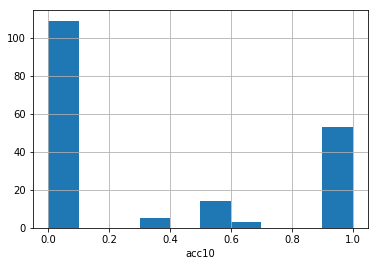

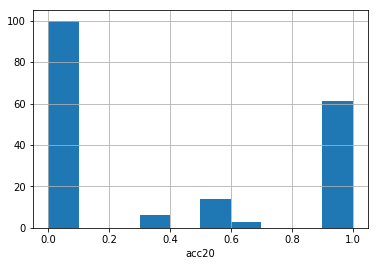

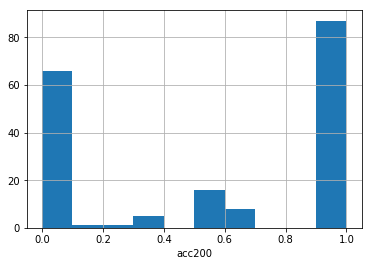

In [15]:
result = evaluate(preds, gold)

ax = result['acc10'].hist()
ax.set_xlabel("acc10")
plt.show()

ax = result['acc20'].hist()
ax.set_xlabel("acc20")
plt.show()

ax = result['acc200'].hist()
ax.set_xlabel("acc200")
plt.show()

# Use MPK rules

In [41]:
fields = ['section']

In [42]:
rules = np.load('../data/rules_%s.npy' % '_'.join(fields))
with open('../data/%s_index.pkl' % '_'.join(fields), 'rb') as f:
    columns, index = pickle.load(f)

In [43]:
df = pd.DataFrame(rules, index = index, columns=columns)

In [44]:
preds = {}
for k, doc in tqdm_notebook(test_docs.items()):
    inferred_vector = model.infer_vector(doc, steps=5)
    sims = model.docvecs.most_similar([inferred_vector], topn=model.docvecs.count)
    if k in df:
        valid = df.index[df[k]]
        preds[k] = [_id for _id,score in sims if _id in valid][:201]
    else:
        preds[k] = [_id for _id,score in sims[:201]]
    

100%|██████████| 184/184 [00:00<00:00, 22843.03it/s]

median
acc10     0.0
acc20     0.0
acc200    0.5
dtype: float64
mean
acc10     0.289855
acc20     0.344203
acc200    0.495652
dtype: float64


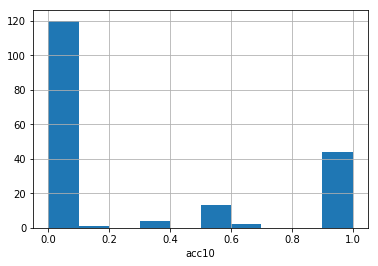

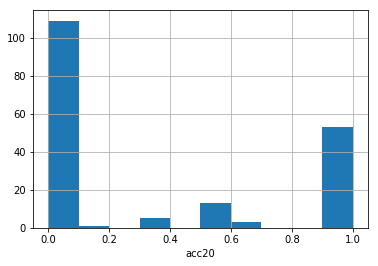

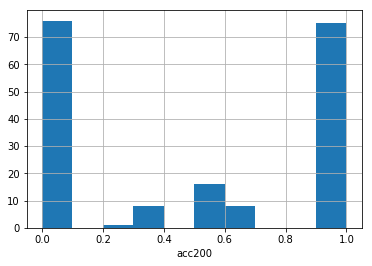

In [45]:
result = evaluate(preds, gold)

ax = result['acc10'].hist()
ax.set_xlabel("acc10")
plt.show()

ax = result['acc20'].hist()
ax.set_xlabel("acc20")
plt.show()

ax = result['acc200'].hist()
ax.set_xlabel("acc200")
plt.show()

In [46]:
# section', 'class_
# acc10     0.279891
# acc20     0.316123
# acc200    0.483152

# section
# acc10     0.289855
# acc20     0.344203
# acc200    0.495652